<a href="https://www.kaggle.com/code/dataranch/idealista-listings-eda-feature-importance?scriptVersionId=106692610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Spain Real Estate Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

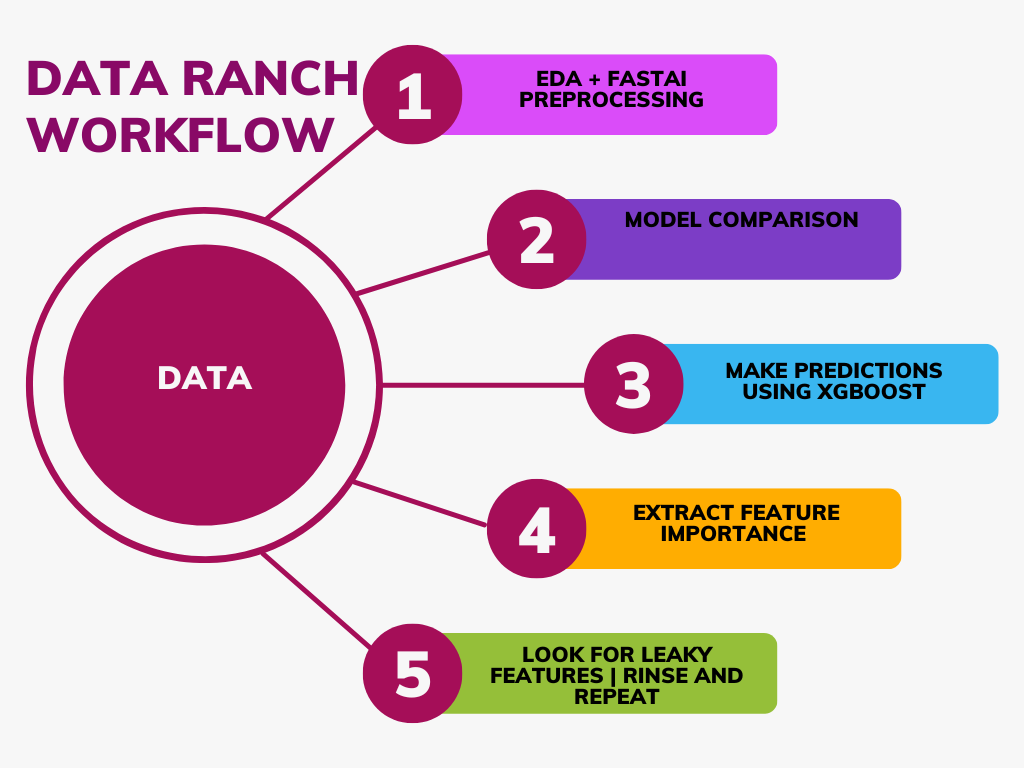

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.5 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'idealista-madrid-rental-real-state'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/idealista-madrid-rental-real-state
CSV!


In [9]:
df

,propertyCode,thumbnail,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/7a/b5/61/1027174063.jpg,33,550.00,chalet,rent,371.00,False,6,3,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/59/73/3f/1024519300.jpg,12,750.00,flat,rent,60.00,True,1,1,...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/0e/a1/25/1025350613.jpg,21,750.00,flat,rent,70.00,True,2,1,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/96/1a/25/1018319776.jpg,28,400.00,penthouse,rent,67.00,True,2,2,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/6c/2d/5b/1022163220.jpg,22,450.00,flat,rent,89.00,False,2,1,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,98815692,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/9d/72/69/1024671265.jpg,16,640.00,flat,rent,69.00,True,2,1,...,False,False,2806/28060001/00000281,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,NaN
446,97765107,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/03/f8/dc/989708380.jpg,19,700.00,flat,rent,54.00,True,1,1,...,False,False,CH-95178-0001,1,Getafe Centro,NaN,True,NaN,NaN,NaN
447,98620594,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/36/d5/1f/1018288747.jpg,16,700.00,flat,rent,59.00,True,1,1,...,False,False,NaN,6,Carabanchel,Pau de Carabanchel,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,NaN
448,98791417,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/7a/b7/a9/1023937294.jpg,11,700.00,flat,rent,75.00,True,2,1,...,False,False,NaN,1,Pryconsa - Poligono Europa,NaN,False,NaN,NaN,NaN


In [10]:
df.isna().sum()

propertyCode                0
thumbnail                   1
numPhotos                   0
price                       0
propertyType                0
operation                   0
size                        0
exterior                    0
rooms                       0
bathrooms                   0
address                     0
province                    0
municipality                0
country                     0
latitude                    0
longitude                   0
showAddress                 0
url                         0
distance                    0
description                 1
hasVideo                    0
status                      0
newDevelopment              0
priceByArea                 0
detailedType                0
suggestedTexts              0
hasPlan                     0
has3DTour                   0
has360                      0
hasStaging                  0
superTopHighlight           0
topNewDevelopment           0
externalReference          92
floor     

<AxesSubplot:>

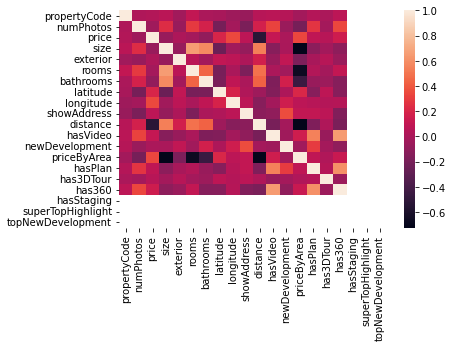

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,propertyCode,thumbnail,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,url,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/7a/b5/61/1027174063.jpg,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,40.07,-3.82,False,https://www.idealista.com/inmueble/98903350/,40116,"UGENA VILLAGE INMOBILIARIA GESTIONA en exclusiva el alquiler de CHALET INDIVIDUAL en urbanización Villeriche. La vivienda está dividida en apartamentos-casas que se pueden alquilar en conjunto o por separado. La primera vivienda cuenta con salón con estufa de pellets, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora y nevera, 4 habitaciones (la principal con vestidor y baño con bañera y ducha de hidromasaje), 2 baños completos, y cuarto de plancha. Todas las estancias tienen aire acondicionado con bomba frio-calor. Vivienda recién reformada, muy luminosa y espaciosa. La segunda vivienda cuenta con 2 habitaciones, salon con aire acondicionado, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora, nevera y aire acondicionado y baño con bañera. Alquiler vivienda 4 habitaciones: 800€ Alquiler vivienda 2 habitaciones: 550€ Alquiler vivienda entera: 1350€ *LA VIVIENDA TIENE CONTRATADO UN MANTENIMIENTO DE ZONAS COMUNES (PISCINA, CENADOR.. . ). Zona muy tranquila. A 2 minutos de la CM-41, a 5 minutos de la A-42.",False,good,False,1.00,"{'typology': 'chalet', 'subTypology': 'independantHouse'}","{'subtitle': 'Numancia de la Sagra', 'title': 'Casa independiente'}",False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan
1,91615378,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/59/73/3f/1024519300.jpg,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,40.46,-3.65,True,https://www.idealista.com/inmueble/91615378/,7037,"LOFT DE DISEÑO. Orientación Este. Muy soleado y luminoso. Este loft te ofrece la posibilidad de vivir en espacios amplios completamente integrados unos con otros. El dormitorio separado de las otras estancias por un amplio armario hace que sea una estancia completamente independiente. El cuarto de baño, tiene perfectamente delimitadas e individualizadas la zona de ducha con columna de hidromasaje, lavabo de acero y la zona del inodoro separada por puerta corredera de cristal al ácido. La cocina integrada en salón-comedor equipada con todos los electrodomésticos y gran espacio de almacenamiento. Suelos de porcelánico gris. Paredes lisas. Calefacción y aire acondicionado INDIVIDUAL frío/calor. Agua caliente termo eléctrico de 100 litros. Edificio de 12 lofts muy tranquilo, a 3 minutos andando del metro Pinar del Rey y del Centro Comercial Gran Vía de Hortaleza. Acceso a M-30 a 2 minutos Posibilidad de plaza de garaje en el mismo edificio: + 60 €/mes. Trastero en el mismo edificio: +35€/mes. Disponibilidad inmediata. Se exigen garantías.",False,good,False,13.00,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Piso en Calle de Alejandro Villegas, 23'}",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,nan,nan,nan
2,88363329,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/0e/a1/25/1025350613.jpg,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,40.55,-3.63,False,https://www.idealista.com/inmueble/88363329/,16145,"Estupendo piso muy iluminado, recientemente reformado. Consta de dos dormitorios con armarios empotrados, baño con plato de ducha, espacioso salón y cocina equipada con electrodomésticos (incluye vitro, refrigerador, h

In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
propertyCode,450.00,94635146.39,13858169.73,666696.00,97564945.50,98660320.50,98894324.25,98939685.00
numPhotos,450.00,21.90,9.67,0.00,15.00,21.00,28.00,72.00
price,450.00,671.80,85.10,340.00,640.00,700.00,740.00,750.00
size,450.00,68.24,35.66,20.00,47.25,62.00,80.00,371.00
rooms,450.00,1.70,0.97,0.00,1.00,2.00,2.00,6.00
bathrooms,450.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
latitude,450.00,40.39,0.18,39.93,40.30,40.41,40.48,40.91
longitude,450.00,-3.70,0.23,-4.33,-3.78,-3.70,-3.60,-3.11
distance,450.00,22455.77,17001.69,183.00,7104.25,20294.00,34979.75,59919.00
priceByArea,450.00,11.88,5.40,1.00,8.00,11.00,15.00,33.00


In [14]:
df.columns

Index(['propertyCode', 'thumbnail', 'numPhotos', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'country', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight',
       'topNewDevelopment', 'externalReference', 'floor', 'district',
       'neighborhood', 'hasLift', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

In [15]:
#remove leaky features
del(df['propertyCode'])
del(df['address'])
del(df['latitude'])
del(df['longitude'])
del(df['description'])
del(df['url'])
del(df['suggestedTexts'])
del(df['externalReference'])

Target Variable: newDevelopmentFinished
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'oper

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.011494252873563315, 'Adjusted R-Squared': -0.3538461538461539, 'RMSE': 0.10660035817780522, 'Time taken': 0.02354907989501953}


 12%|█▏        | 5/42 [00:00<00:00, 49.06it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.10252873563218401, 'Adjusted R-Squared': -0.47569230769230764, 'RMSE': 0.1112940413335936, 'Time taken': 0.034104108810424805}
{'Model': 'BayesianRidge', 'R-Squared': 0.45187881101384086, 'Adjusted R-Squared': 0.2663608701262178, 'RMSE': 0.07847209543926169, 'Time taken': 0.020496845245361328}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.011494252873563315, 'Adjusted R-Squared': -0.3538461538461539, 'RMSE': 0.10660035817780522, 'Time taken': 0.012537956237792969}
{'Model': 'DummyRegressor', 'R-Squared': -0.006296175223059031, 'Adjusted R-Squared': -0.3468887268370173, 'RMSE': 0.10632609528611552, 'Time taken': 0.010628938674926758}
{'Model': 'ElasticNet', 'R-Squared': -0.006296175223059031, 'Adjusted R-Squared': -0.3468887268370173, 'RMSE': 0.10632609528611552, 'Time taken': 0.013586997985839844}
{'Model': 'ElasticNetCV', 'R-Squared': 0.4565348301205211, 'Adjusted R-Squared': 0.2725927726228513, 'RMSE': 0.0781380937618448, 'Time taken

 24%|██▍       | 10/42 [00:00<00:01, 28.42it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.011494252873563315, 'Adjusted R-Squared': -0.3538461538461539, 'RMSE': 0.10660035817780522, 'Time taken': 0.1128392219543457}
{'Model': 'GammaRegressor', 'R-Squared': 0.4072533835830958, 'Adjusted R-Squared': 0.2066314518727591, 'RMSE': 0.08160400916316486, 'Time taken': 0.014449834823608398}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -26.97598634393715, 'Adjusted R-Squared': -36.44478172188511, 'RMSE': 0.5606213822039, 'Time taken': 0.05776715278625488}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.409323010994013, 'Adjusted R-Squared': 0.2094015685612175, 'RMSE': 0.08146142076959967, 'Time taken': 0.026322603225708008}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.011493190373167872, 'Adjusted R-Squared': -0.35384473173024, 'RMSE': 0.10660030218986849, 'Time taken': 0.10391569137573242}


 40%|████      | 17/42 [00:00<00:01, 16.19it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.20338581948095125, 'Adjusted R-Squared': -0.6106856353052732, 'RMSE': 0.11627313946749447, 'Time taken': 0.3310840129852295}
{'Model': 'HuberRegressor', 'R-Squared': 0.06732277889143679, 'Adjusted R-Squared': -0.248352588253, 'RMSE': 0.10236291366790151, 'Time taken': 0.0597686767578125}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5954022988505747, 'Adjusted R-Squared': 0.4584615384615385, 'RMSE': 0.06741998624632421, 'Time taken': 0.01676201820373535}
{'Model': 'KernelRidge', 'R-Squared': -91.85377134694515, 'Adjusted R-Squared': -123.28120164898812, 'RMSE': 1.0213550204950899, 'Time taken': 0.025914907455444336}
{'Model': 'Lars', 'R-Squared': 0.44834520043456416, 'Adjusted R-Squared': 0.2616312682739551, 'RMSE': 0.07872463480565138, 'Time taken': 0.025756359100341797}


 55%|█████▍    | 23/42 [00:01<00:00, 19.06it/s]

{'Model': 'LarsCV', 'R-Squared': 0.45793019423133896, 'Adjusted R-Squared': 0.27446041381733066, 'RMSE': 0.0780377182704998, 'Time taken': 0.08047294616699219}
{'Model': 'Lasso', 'R-Squared': -0.006296175223059031, 'Adjusted R-Squared': -0.3468887268370173, 'RMSE': 0.10632609528611552, 'Time taken': 0.01671147346496582}
{'Model': 'LassoCV', 'R-Squared': 0.4558625153203264, 'Adjusted R-Squared': 0.27169290512105226, 'RMSE': 0.07818641071270503, 'Time taken': 0.07715940475463867}
{'Model': 'LassoLars', 'R-Squared': -0.006296175223059031, 'Adjusted R-Squared': -0.3468887268370173, 'RMSE': 0.10632609528611552, 'Time taken': 0.0128936767578125}
{'Model': 'LassoLarsCV', 'R-Squared': 0.45793019423133896, 'Adjusted R-Squared': 0.27446041381733066, 'RMSE': 0.0780377182704998, 'Time taken': 0.04039430618286133}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4670451689052232, 'Adjusted R-Squared': 0.28666045684237573, 'RMSE': 0.07737882948343791, 'Time taken': 0.023131847381591797}
{'Model': 'LinearRegr

 71%|███████▏  | 30/42 [00:02<00:01,  7.90it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.038103561262853, 'Adjusted R-Squared': -1.7279232281518184, 'RMSE': 0.15131782076451888, 'Time taken': 1.3464751243591309}
{'Model': 'NuSVR', 'R-Squared': 0.0031413859293414337, 'Adjusted R-Squared': -0.3342569142176506, 'RMSE': 0.1058263304618812, 'Time taken': 0.06447243690490723}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4381027844709773, 'Adjusted R-Squared': 0.24792218844576963, 'RMSE': 0.07945210248791486, 'Time taken': 0.018365859985351562}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4381027844709773, 'Adjusted R-Squared': 0.24792218844576963, 'RMSE': 0.07945210248791486, 'Time taken': 0.02436089515686035}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.3838590372253623, 'Adjusted R-Squared': -0.8522420959785617, 'RMSE': 0.12468748963763007, 'Time taken': 0.014944791793823242}
{'Model': 'PoissonRegressor', 'R-Squared': 0.41955832761493295, 'Adjusted R-Squared': 0.22310114619229493, 'RMSE': 0.08075255021935

 86%|████████▌ | 36/42 [00:03<00:00, 11.06it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.0652781609195402, 'Adjusted R-Squared': -0.25108923076923073, 'RMSE': 0.10247505239635822, 'Time taken': 0.1599881649017334}
{'Model': 'Ridge', 'R-Squared': 0.448768266070785, 'Adjusted R-Squared': 0.2621975253562815, 'RMSE': 0.07869444194252125, 'Time taken': 0.012536048889160156}
{'Model': 'RidgeCV', 'R-Squared': 0.4515893822482703, 'Adjusted R-Squared': 0.2659734808553772, 'RMSE': 0.07849281082552328, 'Time taken': 0.013246774673461914}


100%|██████████| 42/42 [00:03<00:00, 13.09it/s]


{'Model': 'SGDRegressor', 'R-Squared': 0.4410871673471505, 'Adjusted R-Squared': 0.2519166701415707, 'RMSE': 0.07924082614407549, 'Time taken': 0.01674199104309082}
{'Model': 'SVR', 'R-Squared': -0.6517344391736859, 'Adjusted R-Squared': -1.210783018586318, 'RMSE': 0.13622194163293114, 'Time taken': 0.016450166702270508}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4483452004345643, 'Adjusted R-Squared': 0.26163126827395533, 'RMSE': 0.07872463480565138, 'Time taken': 0.012508392333984375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.409323010994013, 'Adjusted R-Squared': 0.2094015685612175, 'RMSE': 0.08146142076959967, 'Time taken': 0.012611627578735352}
{'Model': 'XGBRegressor', 'R-Squared': -0.01137562000367942, 'Adjusted R-Squared': -0.35368736831261693, 'RMSE': 0.1065941, 'Time taken': 0.04194831848144531}
{'Model': 'LGBMRegressor', 'R-Squared': -0.18343809667733946, 'Adjusted R-Squared': -0.5839863755527466, 'RMSE': 0.11530542132684674, 'Time taken': 0.06176304817199707}

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.096916,1.081743,1.040069,00:00
1,2.879964,0.768180,0.876459,00:00
2,2.845962,0.268488,0.518158,00:00
3,2.522080,0.347379,0.589388,00:00


Better model found at epoch 0 with _rmse value: 1.0400688648223877.
Better model found at epoch 1 with _rmse value: 0.8764588832855225.
Better model found at epoch 2 with _rmse value: 0.5181582570075989.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.1065941


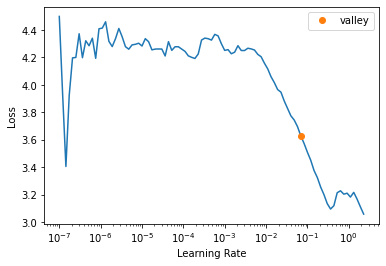

<Figure size 720x720 with 0 Axes>

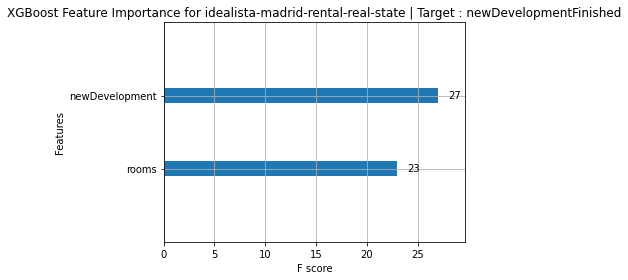

Target Variable: hasLift
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exteri

 17%|█▋        | 7/42 [00:00<00:00, 41.22it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.19378702600037667, 'Adjusted R-Squared': -0.07908505750718797, 'RMSE': 0.4470878148806816, 'Time taken': 0.021288156509399414}
{'Model': 'BaggingRegressor', 'R-Squared': 0.09789953745576507, 'Adjusted R-Squared': -0.20742677294382195, 'RMSE': 0.472928400188847, 'Time taken': 0.03431963920593262}
{'Model': 'BayesianRidge', 'R-Squared': 0.21020076618581407, 'Adjusted R-Squared': -0.05711589756667945, 'RMSE': 0.4425132674335955, 'Time taken': 0.011006832122802734}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.2343301209372639, 'Adjusted R-Squared': -0.6521033926391069, 'RMSE': 0.553201826993914, 'Time taken': 0.010460853576660156}
{'Model': 'DummyRegressor', 'R-Squared': -0.041923085107514746, 'Adjusted R-Squared': -0.39457397545159667, 'RMSE': 0.5082598131172308, 'Time taken': 0.00921487808227539}
{'Model': 'ElasticNet', 'R-Squared': -0.041923085107514746, 'Adjusted R-Squared': -0.39457397545159667, 'RMSE': 0.5082598131172308, 'Time take

 29%|██▊       | 12/42 [00:00<00:01, 26.40it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.935182632249073, 'Adjusted R-Squared': -4.26709060008722, 'RMSE': 0.9877576197801029, 'Time taken': 0.03934144973754883}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.16495730094309946, 'Adjusted R-Squared': -0.1176725356607744, 'RMSE': 0.45501140637511817, 'Time taken': 0.02503657341003418}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2905054323910401, 'Adjusted R-Squared': 0.050368809508007595, 'RMSE': 0.4194135715916681, 'Time taken': 0.11130261421203613}


 36%|███▌      | 15/42 [00:00<00:01, 14.51it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.18408715633588835, 'Adjusted R-Squared': -0.09206795998119555, 'RMSE': 0.44976931929365627, 'Time taken': 0.28713083267211914}
{'Model': 'HuberRegressor', 'R-Squared': 0.21511154247860276, 'Adjusted R-Squared': -0.050543012374793195, 'RMSE': 0.4411354032647681, 'Time taken': 0.02076411247253418}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.024666666666666504, 'Adjusted R-Squared': -0.3054461538461539, 'RMSE': 0.4917501213199462, 'Time taken': 0.015661001205444336}
{'Model': 'KernelRidge', 'R-Squared': -8.797670401071354, 'Adjusted R-Squared': -12.113804998357041, 'RMSE': 1.5585809185295667, 'Time taken': 0.03687167167663574}
{'Model': 'Lars', 'R-Squared': 0.2072018505478056, 'Adjusted R-Squared': -0.06112983080524481, 'RMSE': 0.44335259631310253, 'Time taken': 0.04322338104248047}
{'Model': 'LarsCV', 'R-Squared': 0.1904018279800569, 'Adjusted R-Squared': -0.08361601485746228, 'RMSE': 0.44802546747821914, 'Time taken': 0.08190

 62%|██████▏   | 26/42 [00:01<00:00, 22.72it/s]

{'Model': 'Lasso', 'R-Squared': -0.041923085107514746, 'Adjusted R-Squared': -0.39457397545159667, 'RMSE': 0.5082598131172308, 'Time taken': 0.014728307723999023}
{'Model': 'LassoCV', 'R-Squared': 0.19826476698732065, 'Adjusted R-Squared': -0.0730917734169707, 'RMSE': 0.4458445138150871, 'Time taken': 0.07846212387084961}
{'Model': 'LassoLars', 'R-Squared': -0.041923085107514746, 'Adjusted R-Squared': -0.39457397545159667, 'RMSE': 0.5082598131172308, 'Time taken': 0.011810302734375}
{'Model': 'LassoLarsCV', 'R-Squared': 0.19563447490167285, 'Adjusted R-Squared': -0.0766123182085301, 'RMSE': 0.44657526692892774, 'Time taken': 0.040897369384765625}
{'Model': 'LassoLarsIC', 'R-Squared': 0.178185455446231, 'Adjusted R-Squared': -0.09996715963350611, 'RMSE': 0.45139303517379814, 'Time taken': 0.01752614974975586}
{'Model': 'LinearRegression', 'R-Squared': 0.2136473604204191, 'Adjusted R-Squared': -0.05250276374497753, 'RMSE': 0.4415466729107737, 'Time taken': 0.012533187866210938}
{'Model':

 69%|██████▉   | 29/42 [00:03<00:03,  4.15it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.15936782138262695, 'Adjusted R-Squared': -0.12515383907248379, 'RMSE': 0.4565317089864542, 'Time taken': 2.2204766273498535}
{'Model': 'NuSVR', 'R-Squared': 0.14493601812394508, 'Adjusted R-Squared': -0.14447025266487334, 'RMSE': 0.4604338544779642, 'Time taken': 0.05842709541320801}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.18931959976453283, 'Adjusted R-Squared': -0.08506453569977901, 'RMSE': 0.4483248159027649, 'Time taken': 0.021765708923339844}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.15318410229432144, 'Adjusted R-Squared': -0.1334305092368313, 'RMSE': 0.4582077637961417, 'Time taken': 0.03173351287841797}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.087108339372439, 'Adjusted R-Squared': -0.4550527003908029, 'RMSE': 0.5191637441432482, 'Time taken': 0.010957956314086914}
{'Model': 'PoissonRegressor', 'R-Squared': 0.18421178730202292, 'Adjusted R-Squared': -0.09190114622652312, 'RMSE': 0.44973496677303

 79%|███████▊  | 33/42 [00:03<00:01,  5.87it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.14885545884610285, 'Adjusted R-Squared': -0.13922423200598533, 'RMSE': 0.4593773744830242, 'Time taken': 0.1895132064819336}
{'Model': 'Ridge', 'R-Squared': 0.21374009459928722, 'Adjusted R-Squared': -0.05237864261326175, 'RMSE': 0.4415206364524764, 'Time taken': 0.010795831680297852}


 98%|█████████▊| 41/42 [00:04<00:00,  9.89it/s]

{'Model': 'RidgeCV', 'R-Squared': 0.2141920983658644, 'Adjusted R-Squared': -0.051773652956458305, 'RMSE': 0.44139370788881355, 'Time taken': 0.014295101165771484}
{'Model': 'SGDRegressor', 'R-Squared': 0.22000744926836524, 'Adjusted R-Squared': -0.043990029440803324, 'RMSE': 0.4397574136112149, 'Time taken': 0.015231609344482422}
{'Model': 'SVR', 'R-Squared': 0.11200940810242732, 'Adjusted R-Squared': -0.18854125377059727, 'RMSE': 0.4692152562191682, 'Time taken': 0.028400421142578125}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2136473604204191, 'Adjusted R-Squared': -0.05250276374497753, 'RMSE': 0.4415466729107737, 'Time taken': 0.012772798538208008}
{'Model': 'TweedieRegressor', 'R-Squared': 0.16495730094309946, 'Adjusted R-Squared': -0.1176725356607744, 'RMSE': 0.45501140637511817, 'Time taken': 0.01570868492126465}
{'Model': 'XGBRegressor', 'R-Squared': -0.020940731379134103, 'Adjusted R-Squared': -0.36648990199976406, 'RMSE': 0.5031161, 'Time taken': 0.094178915023803

100%|██████████| 42/42 [00:04<00:00, 10.07it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.18063375485238065, 'Adjusted R-Squared': -0.0966902050437366, 'RMSE': 0.4507201524468634, 'Time taken': 0.09686088562011719}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: hasLift
hasLift
Target Standard Deviation: 0.4967978152136538
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.05       0.29  0.42        0.11
SGDRegressor                                -0.04       0.22  0.44        0.02
HuberRegressor                              -0.05       0.22  0.44        0.02
RidgeCV                                     -0.05       0.21  0.44        0.01
Ridge                                       -0.05       0.21  0.44        0.01
TransformedTargetRegressor                  -0.05       0.21  0.44        0.01
LinearRegression                            -0.05   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.143342,2.602575,1.613250,00:00
1,4.576049,0.499935,0.707061,00:00
2,4.064946,0.255256,0.505228,00:00
3,3.264453,0.310600,0.557315,00:00


Better model found at epoch 0 with _rmse value: 1.613249659538269.
Better model found at epoch 1 with _rmse value: 0.7070608735084534.
Better model found at epoch 2 with _rmse value: 0.5052282810211182.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.50
1       1       0.94
2       1       1.56
3       1       0.93
4       1       1.82
XGBoost RMSE:  0.5031161


<Figure size 432x288 with 0 Axes>

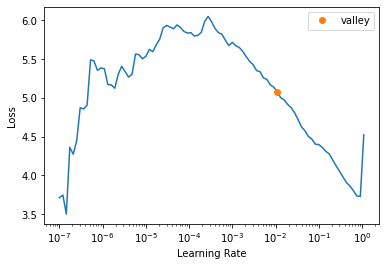

<Figure size 720x720 with 0 Axes>

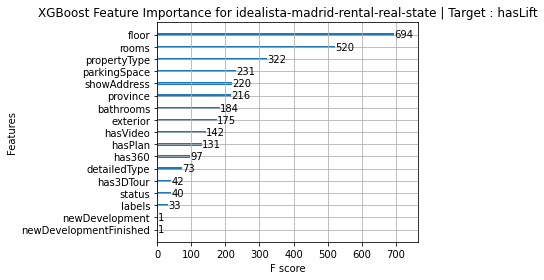

Target Variable: topNewDevelopment
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01674175262451172}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03316974639892578}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01330256462097168}


 14%|█▍        | 6/42 [00:00<00:00, 55.74it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014539003372192383}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012229681015014648}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016966581344604492}


 29%|██▊       | 12/42 [00:00<00:01, 19.51it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24591326713562012}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01229715347290039}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10207629203796387}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011781454086303711}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.4801029817236911, 'Time taken': 0.03782248497009277}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03564929962158203}


 38%|███▊      | 16/42 [00:00<00:01, 20.71it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07805013656616211}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.037607669830322266}
{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 5.346198605685008e-12, 'Time taken': 0.02987980842590332}
{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01588606834411621}
{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.999999999999963, 'Time taken': 0.023900985717773438}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.017690658569335938}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [00:00<00:00, 22.82it/s]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07061624526977539}


 55%|█████▍    | 23/42 [00:01<00:01, 16.43it/s]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.291780948638916}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.013408899307250977}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014153003692626953}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016735076904296875}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 1.603919451354788e-05, 'Time taken': 0.014901399612426758}


 79%|███████▊  | 33/42 [00:02<00:00,  9.87it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.13502908437880395, 'Time taken': 1.3221564292907715}
{'Model': 'NuSVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.015811920166015625}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012786626815795898}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.039195395051594924, 'Time taken': 0.013904094696044922}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.013942241668701172}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attribu

100%|██████████| 42/42 [00:02<00:00, 14.01it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1494736671447754}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011757373809814453}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011077880859375}
{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.0035613911471434325, 'Time taken': 0.01243281364440918}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01006174087524414}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011034011840820312}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01020193099975586}
{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.031890153884887695}
{'Model

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.633314,1.113108,1.055039,00:00
1,5.577462,0.166115,0.407572,00:00
2,4.952451,0.041622,0.204016,00:00
3,4.345481,0.044218,0.210281,00:00


Better model found at epoch 0 with _rmse value: 1.0550392866134644.
Better model found at epoch 1 with _rmse value: 0.4075721502304077.
Better model found at epoch 2 with _rmse value: 0.2040155529975891.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: superTopHighlight
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
Tabular Object size: 442


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014676809310913086}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.028320789337158203}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01080012321472168}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010061979293823242}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011719942092895508}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016862869262695312}


 24%|██▍       | 10/42 [00:00<00:01, 22.12it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.23198866844177246}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012565374374389648}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10336923599243164}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01208806037902832}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.5253034304450551, 'Time taken': 0.036585330963134766}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.021941661834716797}


 40%|████      | 17/42 [00:00<00:01, 21.95it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10659527778625488}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04131340980529785}
{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 5.6799516497903634e-12, 'Time taken': 0.02875351905822754}
{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014824628829956055}
{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 1.0000000000000349, 'Time taken': 0.0731663703918457}


 48%|████▊     | 20/42 [00:00<00:00, 22.30it/s]

{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0575556755065918}
LarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.026621103286743164}


 55%|█████▍    | 23/42 [00:01<00:01, 15.54it/s]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2962193489074707}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014755487442016602}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016748428344726562}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.015557527542114258}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 3.269520519700736e-05, 'Time taken': 0.01555180549621582}


 76%|███████▌  | 32/42 [00:02<00:01,  8.64it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.11817200357716616, 'Time taken': 1.4278151988983154}
{'Model': 'NuSVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.027202367782592773}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.022193193435668945}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.040556676996685484, 'Time taken': 0.02393341064453125}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.021265268325805664}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attribut

100%|██████████| 42/42 [00:03<00:00, 13.10it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14744973182678223}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011394023895263672}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.013415813446044922}
{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.005090439670725539, 'Time taken': 0.011739253997802734}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011007547378540039}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011715412139892578}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011228322982788086}
{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03603315353393555}
{'

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12.002638,2.794247,1.671600,00:00
1,9.878525,3.515382,1.874935,00:00


Better model found at epoch 0 with _rmse value: 1.6715999841690063.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: hasStaging
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
Tabular Object size: 442


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01503133773803711}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.029787778854370117}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011198043823242188}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010129451751708984}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01157236099243164}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016039609909057617}


 24%|██▍       | 10/42 [00:00<00:01, 22.42it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2318575382232666}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011786460876464844}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09987139701843262}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010776042938232422}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.5331042344912247, 'Time taken': 0.03860139846801758}


 31%|███       | 13/42 [00:00<00:01, 20.17it/s]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0443120002746582}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09139776229858398}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.037049293518066406}
{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 5.048090326759993e-12, 'Time taken': 0.028223752975463867}
{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014318227767944336}


 40%|████      | 17/42 [00:00<00:01, 22.62it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 1.0000000000000089, 'Time taken': 0.06160402297973633}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.021558761596679688}
LarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04060173034667969}


 50%|█████     | 21/42 [00:01<00:01, 15.47it/s]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.30614256858825684}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.014626502990722656}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.013786077499389648}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0129547119140625}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 3.406433808558294e-07, 'Time taken': 0.013644218444824219}


 76%|███████▌  | 32/42 [00:02<00:01,  9.67it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.1036316557017049, 'Time taken': 1.4230353832244873}
{'Model': 'NuSVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.021622180938720703}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016115903854370117}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.04177914021053066, 'Time taken': 0.024366378784179688}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.024784326553344727}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attribute

100%|██████████| 42/42 [00:03<00:00, 13.28it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16627240180969238}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012469291687011719}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.016143798828125}
{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.33846153846153837, 'RMSE': 0.00326917964024238, 'Time taken': 0.011797904968261719}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010212182998657227}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010785818099975586}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.010247468948364258}
{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03503084182739258}
{'Mode

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,8.277523,0.011013,0.104943,00:00
1,6.824302,0.015035,0.122618,00:00


Better model found at epoch 0 with _rmse value: 0.10494299232959747.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: has360
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
Tabular Object size: 442


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.3425052199729941, 'Adjusted R-Squared': 0.11996852519462298, 'RMSE': 0.32707605810165874, 'Time taken': 0.023284912109375}
{'Model': 'BaggingRegressor', 'R-Squared': 0.394651194393414, 'Adjusted R-Squared': 0.18976390634195417, 'RMSE': 0.3138379406291475, 'Time taken': 0.029990673065185547}
{'Model': 'BayesianRidge', 'R-Squared': 0.3272218977032364, 'Adjusted R-Squared': 0.0995123861566396, 'RMSE': 0.330855626162482, 'Time taken': 0.011644363403320312}


 17%|█▋        | 7/42 [00:00<00:00, 41.87it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.12419047619047618, 'Adjusted R-Squared': -0.17223736263736256, 'RMSE': 0.37749172176353746, 'Time taken': 0.012924671173095703}
{'Model': 'DummyRegressor', 'R-Squared': -8.2078220546844e-06, 'Adjusted R-Squared': -0.3384725243156732, 'RMSE': 0.40337073150783115, 'Time taken': 0.010544776916503906}
{'Model': 'ElasticNet', 'R-Squared': -8.2078220546844e-06, 'Adjusted R-Squared': -0.3384725243156732, 'RMSE': 0.40337073150783115, 'Time taken': 0.010453462600708008}
{'Model': 'ElasticNetCV', 'R-Squared': 0.3340432223131201, 'Adjusted R-Squared': 0.10864246678833, 'RMSE': 0.3291740736292473, 'Time taken': 0.067779541015625}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.12419047619047618, 'Adjusted R-Squared': -0.17223736263736256, 'RMSE': 0.37749172176353746, 'Time taken': 0.012435674667358398}


 29%|██▊       | 12/42 [00:00<00:01, 29.74it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.19167460317460316, 'Adjusted R-Squared': -0.08191245421245408, 'RMSE': 0.3626567059405304, 'Time taken': 0.13292956352233887}
{'Model': 'GammaRegressor', 'R-Squared': 0.38804878135443666, 'Adjusted R-Squared': 0.1809268304282461, 'RMSE': 0.31554478165880595, 'Time taken': 0.013025760650634766}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6670190847441035, 'Adjusted R-Squared': -2.5697024672728768, 'RMSE': 0.6587424673359817, 'Time taken': 0.03139758110046387}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3838525122271832, 'Adjusted R-Squared': 0.17531028559638373, 'RMSE': 0.3166248094559802, 'Time taken': 0.024115562438964844}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.406756335239415, 'Adjusted R-Squared': 0.20596617178198628, 'RMSE': 0.31068419098613764, 'Time taken': 0.11399149894714355}


 38%|███▊      | 16/42 [00:00<00:01, 15.31it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.34487607233424655, 'Adjusted R-Squared': 0.12314181989353001, 'RMSE': 0.3264858257705638, 'Time taken': 0.2928426265716553}
{'Model': 'HuberRegressor', 'R-Squared': -0.01112783552235741, 'Adjusted R-Squared': -0.35335571831453993, 'RMSE': 0.4056071794016986, 'Time taken': 0.057588815689086914}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4664126984126984, 'Adjusted R-Squared': 0.2858139194139194, 'RMSE': 0.2946492521934882, 'Time taken': 0.01436305046081543}
{'Model': 'KernelRidge', 'R-Squared': -7.854917724213768, 'Adjusted R-Squared': -10.851966800101504, 'RMSE': 1.2003139833560856, 'Time taken': 0.051628828048706055}
{'Model': 'Lars', 'R-Squared': 0.31186251573093715, 'Adjusted R-Squared': 0.07895444413217745, 'RMSE': 0.33461099557530083, 'Time taken': 0.031511783599853516}


 52%|█████▏    | 22/42 [00:01<00:01, 17.92it/s]

{'Model': 'LarsCV', 'R-Squared': 0.3332578008351652, 'Adjusted R-Squared': 0.10759121034860575, 'RMSE': 0.329368128417134, 'Time taken': 0.09783172607421875}
{'Model': 'Lasso', 'R-Squared': -8.2078220546844e-06, 'Adjusted R-Squared': -0.3384725243156732, 'RMSE': 0.40337073150783115, 'Time taken': 0.013234615325927734}
{'Model': 'LassoCV', 'R-Squared': 0.3320320499536279, 'Adjusted R-Squared': 0.10595058993793283, 'RMSE': 0.32967074754908093, 'Time taken': 0.07651257514953613}
{'Model': 'LassoLars', 'R-Squared': -8.2078220546844e-06, 'Adjusted R-Squared': -0.3384725243156732, 'RMSE': 0.40337073150783115, 'Time taken': 0.011896848678588867}
{'Model': 'LassoLarsCV', 'R-Squared': 0.3332578008351652, 'Adjusted R-Squared': 0.10759121034860575, 'RMSE': 0.329368128417134, 'Time taken': 0.03749966621398926}
{'Model': 'LassoLarsIC', 'R-Squared': 0.33118149932461316, 'Adjusted R-Squared': 0.10481216063448229, 'RMSE': 0.3298805723294201, 'Time taken': 0.016147851943969727}
{'Model': 'LinearRegress

 64%|██████▍   | 27/42 [00:03<00:02,  5.22it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.33168877641305883, 'Adjusted R-Squared': 0.10549113150670952, 'RMSE': 0.32975544675440543, 'Time taken': 1.863182544708252}


 79%|███████▊  | 33/42 [00:03<00:01,  7.80it/s]

{'Model': 'NuSVR', 'R-Squared': 0.4403536860518077, 'Adjusted R-Squared': 0.25093493363857344, 'RMSE': 0.30175843885513715, 'Time taken': 0.2598743438720703}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.18637833109220103, 'Adjusted R-Squared': -0.08900131069197692, 'RMSE': 0.36384285735481753, 'Time taken': 0.011615276336669922}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.28737457849186254, 'Adjusted R-Squared': 0.04617828198141605, 'RMSE': 0.34051265417368665, 'Time taken': 0.01818537712097168}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.06952128370578203, 'Adjusted R-Squared': -0.24540997411687626, 'RMSE': 0.38909515425724106, 'Time taken': 0.011085987091064453}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4085134451503223, 'Adjusted R-Squared': 0.20831799581658528, 'RMSE': 0.310223746881103, 'Time taken': 0.012204885482788086}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped 

 83%|████████▎ | 35/42 [00:03<00:00,  8.21it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.35088280753136736, 'Adjusted R-Squared': 0.1311816039265995, 'RMSE': 0.32498562875697085, 'Time taken': 0.17441272735595703}
{'Model': 'Ridge', 'R-Squared': 0.3131444388256589, 'Adjusted R-Squared': 0.08067024888972818, 'RMSE': 0.33429917887553684, 'Time taken': 0.0158536434173584}
{'Model': 'RidgeCV', 'R-Squared': 0.32361910494948154, 'Adjusted R-Squared': 0.09469018662469075, 'RMSE': 0.33174032550252514, 'Time taken': 0.013611555099487305}
{'Model': 'SGDRegressor', 'R-Squared': 0.32408039757387697, 'Adjusted R-Squared': 0.09530760906042002, 'RMSE': 0.33162718254790813, 'Time taken': 0.012449026107788086}
{'Model': 'SVR', 'R-Squared': 0.42890856541365807, 'Adjusted R-Squared': 0.2356160798613578, 'RMSE': 0.30482839798538386, 'Time taken': 0.02046346664428711}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.31186251573093937, 'Adjusted R-Squared': 0.07895444413218045, 'RMSE': 0.3346109955753003, 'Time taken': 0.016700029373168945

100%|██████████| 42/42 [00:03<00:00, 10.64it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.2986661904233443, 'Adjusted R-Squared': 0.06129167025893778, 'RMSE': 0.33780417, 'Time taken': 0.11490535736083984}
{'Model': 'LGBMRegressor', 'R-Squared': 0.3546336307437242, 'Adjusted R-Squared': 0.13620193653390789, 'RMSE': 0.32404532887094983, 'Time taken': 0.05905437469482422}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: has360
has360
Target Standard Deviation: 0.4025200707470481
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
KNeighborsRegressor                          0.29       0.47  0.29        0.01
NuSVR                                        0.25       0.44  0.30        0.26
SVR                                          0.24       0.43  0.30        0.02
PoissonRegressor                             0.21       0.41  0.31        0.01
GradientBoostingRegressor                    0.21      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.863345,2.051118,1.432173,00:00
1,4.842192,0.852385,0.923247,00:00
2,4.254398,1.181390,1.086918,00:00


Better model found at epoch 0 with _rmse value: 1.4321725368499756.
Better model found at epoch 1 with _rmse value: 0.9232467412948608.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       2       2.00
2       1       0.99
3       1       1.45
4       1       0.87
XGBoost RMSE:  0.33780813


<Figure size 432x288 with 0 Axes>

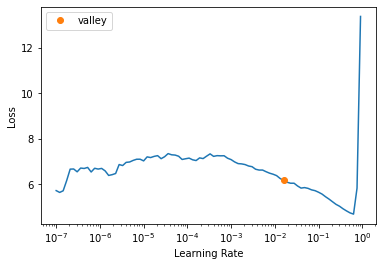

<Figure size 720x720 with 0 Axes>

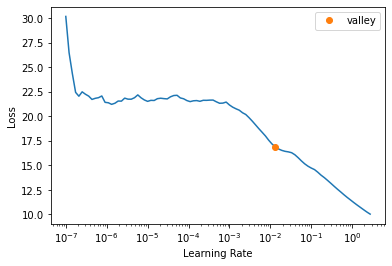

<Figure size 720x720 with 0 Axes>

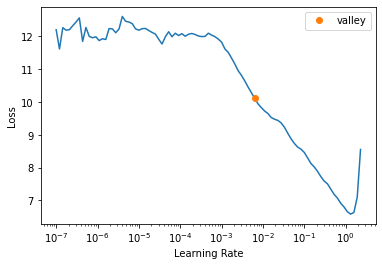

<Figure size 720x720 with 0 Axes>

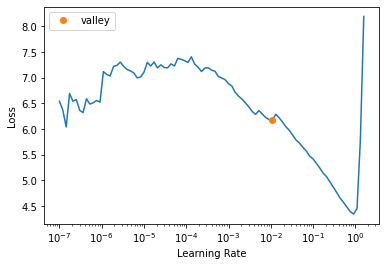

<Figure size 720x720 with 0 Axes>

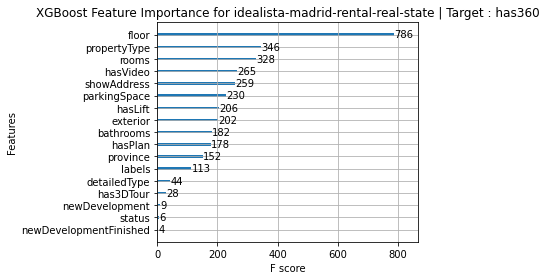

Target Variable: has3DTour
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exte

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.23045517241379332, 'Adjusted R-Squared': -0.03000615384615357, 'RMSE': 0.0929809364625596, 'Time taken': 0.023484230041503906}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6358620689655172, 'Adjusted R-Squared': 0.5126153846153847, 'RMSE': 0.06396021490668313, 'Time taken': 0.03126406669616699}
{'Model': 'BayesianRidge', 'R-Squared': 0.002313946805796774, 'Adjusted R-Squared': -0.3353644096599335, 'RMSE': 0.10587024174563842, 'Time taken': 0.012567520141601562}


 14%|█▍        | 6/42 [00:00<00:00, 59.00it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012498617172241211}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006783770169236369, 'Adjusted R-Squared': -0.33936952000726683, 'RMSE': 0.1060288892784945, 'Time taken': 0.010181903839111328}
{'Model': 'ElasticNet', 'R-Squared': -0.0006783770169236369, 'Adjusted R-Squared': -0.33936952000726683, 'RMSE': 0.1060288892784945, 'Time taken': 0.01116800308227539}
{'Model': 'ElasticNetCV', 'R-Squared': -0.04511947167856567, 'Adjusted R-Squared': -0.3988522159390031, 'RMSE': 0.10835773633316798, 'Time taken': 0.10230374336242676}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01694941520690918}


 29%|██▊       | 12/42 [00:00<00:01, 23.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9772413793103448, 'Adjusted R-Squared': 0.9695384615384616, 'RMSE': 0.015990053726670773, 'Time taken': 0.12978577613830566}
{'Model': 'GammaRegressor', 'R-Squared': 0.0005230220396281737, 'Adjusted R-Squared': -0.33776149357772844, 'RMSE': 0.1059652218370063, 'Time taken': 0.013170480728149414}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -26.560085701403164, 'Adjusted R-Squared': -35.88811470803193, 'RMSE': 0.5564385830413502, 'Time taken': 0.03885197639465332}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.00039390676837425254, 'Adjusted R-Squared': -0.338988767520747, 'RMSE': 0.10601381739871658, 'Time taken': 0.05231118202209473}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.03653023313617387, 'Adjusted R-Squared': -0.28956722641773647, 'RMSE': 0.10403895941959283, 'Time taken': 0.11116766929626465}


 38%|███▊      | 16/42 [00:00<00:01, 14.99it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.3793559448711332, 'Adjusted R-Squared': 0.16929180313520908, 'RMSE': 0.08350226465186505, 'Time taken': 0.24083471298217773}
{'Model': 'HuberRegressor', 'R-Squared': -0.011481435510724447, 'Adjusted R-Squared': -0.3538289982989695, 'RMSE': 0.10659968277120054, 'Time taken': 0.07190394401550293}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4335632183908046, 'Adjusted R-Squared': 0.24184615384615393, 'RMSE': 0.07977240352174657, 'Time taken': 0.01602339744567871}
{'Model': 'KernelRidge', 'R-Squared': -92.19468815437388, 'Adjusted R-Squared': -123.73750568354657, 'RMSE': 1.0232282781336386, 'Time taken': 0.03731203079223633}
{'Model': 'Lars', 'R-Squared': -0.06714029155990064, 'Adjusted R-Squared': -0.42832623639555933, 'RMSE': 0.10949334233276621, 'Time taken': 0.03943133354187012}


 52%|█████▏    | 22/42 [00:01<00:01, 17.74it/s]

{'Model': 'LarsCV', 'R-Squared': -0.04527664521569097, 'Adjusted R-Squared': -0.3990625866733093, 'RMSE': 0.10836588388418497, 'Time taken': 0.09996199607849121}
{'Model': 'Lasso', 'R-Squared': -0.0006783770169236369, 'Adjusted R-Squared': -0.33936952000726683, 'RMSE': 0.1060288892784945, 'Time taken': 0.01269388198852539}
{'Model': 'LassoCV', 'R-Squared': -0.04544989185615145, 'Adjusted R-Squared': -0.3992944706382333, 'RMSE': 0.10837486392193907, 'Time taken': 0.07972264289855957}
{'Model': 'LassoLars', 'R-Squared': -0.0006783770169236369, 'Adjusted R-Squared': -0.33936952000726683, 'RMSE': 0.1060288892784945, 'Time taken': 0.012360572814941406}
{'Model': 'LassoLarsCV', 'R-Squared': -0.04527664521569097, 'Adjusted R-Squared': -0.3990625866733093, 'RMSE': 0.10836588388418497, 'Time taken': 0.03902745246887207}
{'Model': 'LassoLarsIC', 'R-Squared': -0.05447418479275412, 'Adjusted R-Squared': -0.4113731396456861, 'RMSE': 0.10884160319650542, 'Time taken': 0.016280412673950195}
{'Model':

 69%|██████▉   | 29/42 [00:02<00:01,  6.96it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.5184481300856449, 'Adjusted R-Squared': -1.0323844202684787, 'RMSE': 0.13061015194856115, 'Time taken': 1.5120313167572021}
{'Model': 'NuSVR', 'R-Squared': -0.020290797157696217, 'Adjusted R-Squared': -0.36561999004183954, 'RMSE': 0.10706288421645391, 'Time taken': 0.10841655731201172}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.03352303591665051, 'Adjusted R-Squared': -0.3833308326884399, 'RMSE': 0.10775490159506415, 'Time taken': 0.011387348175048828}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.03443789389370289, 'Adjusted R-Squared': -0.38455533490387905, 'RMSE': 0.10780258249914776, 'Time taken': 0.020318269729614258}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.35758869427148476, 'Adjusted R-Squared': -0.8170802523326026, 'RMSE': 0.12349832304798165, 'Time taken': 0.01094675064086914}
{'Model': 'PoissonRegressor', 'R-Squared': -0.0006716609058070588, 'Adjusted R-Squared': -0.3393605307508494, 'RMSE': 0.10

 86%|████████▌ | 36/42 [00:03<00:00, 10.77it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.580432183908046, 'Adjusted R-Squared': 0.4384246153846154, 'RMSE': 0.06865592737438163, 'Time taken': 0.16107749938964844}
{'Model': 'Ridge', 'R-Squared': -0.06565346340139899, 'Adjusted R-Squared': -0.42633617409110314, 'RMSE': 0.10941703815270146, 'Time taken': 0.010973691940307617}
{'Model': 'RidgeCV', 'R-Squared': -0.054609883883423915, 'Adjusted R-Squared': -0.41155476765935184, 'RMSE': 0.10884860632263699, 'Time taken': 0.01157069206237793}
{'Model': 'SGDRegressor', 'R-Squared': -0.05183786800219847, 'Adjusted R-Squared': -0.4078445310183272, 'RMSE': 0.10870545926727034, 'Time taken': 0.013144969940185547}


100%|██████████| 42/42 [00:03<00:00, 12.31it/s]


{'Model': 'SVR', 'R-Squared': 0.0033583324063365394, 'Adjusted R-Squared': -0.33396653970228796, 'RMSE': 0.10581481433587175, 'Time taken': 0.015522956848144531}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.06714029155990131, 'Adjusted R-Squared': -0.4283262363955602, 'RMSE': 0.10949334233276624, 'Time taken': 0.013144254684448242}
{'Model': 'TweedieRegressor', 'R-Squared': -0.00039390676837425254, 'Adjusted R-Squared': -0.338988767520747, 'RMSE': 0.10601381739871658, 'Time taken': 0.012436628341674805}
{'Model': 'XGBRegressor', 'R-Squared': 0.13925013432732503, 'Adjusted R-Squared': -0.1520805894388111, 'RMSE': 0.09833666, 'Time taken': 0.07408785820007324}
{'Model': 'LGBMRegressor', 'R-Squared': 0.37755149984893255, 'Adjusted R-Squared': 0.16687662287472516, 'RMSE': 0.08362356275027039, 'Time taken': 0.05957746505737305}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: has3DTour
has3DTour
Target Standard Deviation: 0.11800338177517186


LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12.292392,2.537270,1.592881,00:00
1,9.694801,3.524044,1.877244,00:00


Better model found at epoch 0 with _rmse value: 1.5928809642791748.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.89
1       1       1.00
2       1       1.00
3       1       0.98
4       1       1.00
XGBoost RMSE:  0.09833666


<Figure size 432x288 with 0 Axes>

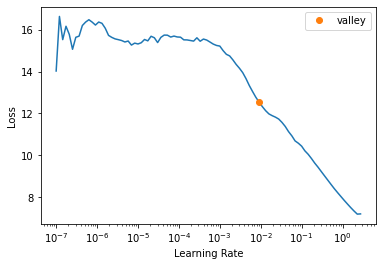

<Figure size 720x720 with 0 Axes>

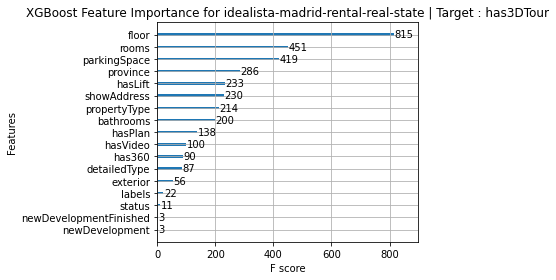

Target Variable: hasPlan
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exteri

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5289899838709726, 'Adjusted R-Squared': 0.36957120918114805, 'RMSE': 0.33014247427302323, 'Time taken': 0.029560089111328125}


 12%|█▏        | 5/42 [00:00<00:00, 47.21it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.48490702821010623, 'Adjusted R-Squared': 0.31056786852737295, 'RMSE': 0.34524638716749356, 'Time taken': 0.03872179985046387}
{'Model': 'BayesianRidge', 'R-Squared': 0.5451956886534985, 'Adjusted R-Squared': 0.3912619217362212, 'RMSE': 0.32441327481095866, 'Time taken': 0.013402938842773438}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.38419642857142866, 'Adjusted R-Squared': 0.17577060439560455, 'RMSE': 0.37749172176353746, 'Time taken': 0.012013912200927734}
{'Model': 'DummyRegressor', 'R-Squared': -0.02108498287757099, 'Adjusted R-Squared': -0.36668297708228725, 'RMSE': 0.4860906584878895, 'Time taken': 0.011701345443725586}
{'Model': 'ElasticNet', 'R-Squared': -0.02108498287757099, 'Adjusted R-Squared': -0.36668297708228725, 'RMSE': 0.4860906584878895, 'Time taken': 0.012558937072753906}
{'Model': 'ElasticNetCV', 'R-Squared': 0.5792375731983623, 'Adjusted R-Squared': 0.43682567489626967, 'RMSE': 0.3120360748169286, 'Time taken': 0.0

 24%|██▍       | 10/42 [00:00<00:01, 25.11it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.5074713169642859, 'Adjusted R-Squared': 0.34076930116758275, 'RMSE': 0.3375997327390152, 'Time taken': 0.15063142776489258}
{'Model': 'GammaRegressor', 'R-Squared': 0.4297550028759045, 'Adjusted R-Squared': 0.23674900384928765, 'RMSE': 0.3632595766055707, 'Time taken': 0.013967514038085938}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.0678851919350563, 'Adjusted R-Squared': -3.106246333820767, 'RMSE': 0.8425697870607611, 'Time taken': 0.03418564796447754}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.44783199170878973, 'Adjusted R-Squared': 0.2609443581333032, 'RMSE': 0.35745547294980345, 'Time taken': 0.023901700973510742}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5962696975263827, 'Adjusted R-Squared': 0.45962251822762, 'RMSE': 0.30565535159855634, 'Time taken': 0.11330294609069824}


 40%|████      | 17/42 [00:00<00:01, 17.56it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5581036131842384, 'Adjusted R-Squared': 0.40853868226198065, 'RMSE': 0.3197765080973273, 'Time taken': 0.25339674949645996}
{'Model': 'HuberRegressor', 'R-Squared': 0.4503181435665897, 'Adjusted R-Squared': 0.26427197677374326, 'RMSE': 0.35664983846042464, 'Time taken': 0.06535840034484863}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.540357142857143, 'Adjusted R-Squared': 0.3847857142857145, 'RMSE': 0.3261343839027654, 'Time taken': 0.014660835266113281}
{'Model': 'KernelRidge', 'R-Squared': -7.361179348184162, 'Adjusted R-Squared': -10.191116973723416, 'RMSE': 1.3909774842042832, 'Time taken': 0.02129650115966797}
{'Model': 'Lars', 'R-Squared': 0.5394771909313704, 'Adjusted R-Squared': 0.3836079324773727, 'RMSE': 0.32644641459611423, 'Time taken': 0.02652120590209961}


 55%|█████▍    | 23/42 [00:01<00:00, 19.68it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5788420111334085, 'Adjusted R-Squared': 0.4362962302862545, 'RMSE': 0.3121827141442186, 'Time taken': 0.09562206268310547}
{'Model': 'Lasso', 'R-Squared': -0.02108498287757099, 'Adjusted R-Squared': -0.36668297708228725, 'RMSE': 0.4860906584878895, 'Time taken': 0.012394189834594727}
{'Model': 'LassoCV', 'R-Squared': 0.5798165780750608, 'Adjusted R-Squared': 0.4376006506543122, 'RMSE': 0.31182130682105297, 'Time taken': 0.07864212989807129}
{'Model': 'LassoLars', 'R-Squared': -0.02108498287757099, 'Adjusted R-Squared': -0.36668297708228725, 'RMSE': 0.4860906584878895, 'Time taken': 0.01213216781616211}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5788420111334085, 'Adjusted R-Squared': 0.4362962302862545, 'RMSE': 0.3121827141442186, 'Time taken': 0.0370790958404541}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5697594252860257, 'Adjusted R-Squared': 0.4241395384597576, 'RMSE': 0.31553098487018844, 'Time taken': 0.016467809677124023}
{'Model': 'LinearRegression'

 69%|██████▉   | 29/42 [00:03<00:02,  5.12it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.49975214202208385, 'Adjusted R-Squared': 0.33043748239878923, 'RMSE': 0.3402349701367874, 'Time taken': 2.021634340286255}
{'Model': 'NuSVR', 'R-Squared': 0.5890145355792002, 'Adjusted R-Squared': 0.44991176300600655, 'RMSE': 0.3083894849235699, 'Time taken': 0.18081331253051758}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5265310452366478, 'Adjusted R-Squared': 0.3662800143936672, 'RMSE': 0.3310031176774332, 'Time taken': 0.011988639831542969}


 79%|███████▊  | 33/42 [00:03<00:01,  7.42it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5706594017975286, 'Adjusted R-Squared': 0.4253441224059229, 'RMSE': 0.3152007985169071, 'Time taken': 0.02016305923461914}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.36923310160951706, 'Adjusted R-Squared': 0.15574276676966137, 'RMSE': 0.38205050458977524, 'Time taken': 0.011623144149780273}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4866631669633549, 'Adjusted R-Squared': 0.31291839270479815, 'RMSE': 0.34465734960476185, 'Time taken': 0.013175725936889648}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 98%|█████████▊| 41/42 [00:03<00:00, 12.67it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5268075874634988, 'Adjusted R-Squared': 0.36665015552806757, 'RMSE': 0.3309064379391909, 'Time taken': 0.19259119033813477}
{'Model': 'Ridge', 'R-Squared': 0.5402033456079389, 'Adjusted R-Squared': 0.38457986258293364, 'RMSE': 0.32618894188757097, 'Time taken': 0.012008905410766602}
{'Model': 'RidgeCV', 'R-Squared': 0.5440926848672396, 'Adjusted R-Squared': 0.3897855935915361, 'RMSE': 0.3248064245349085, 'Time taken': 0.01250910758972168}
{'Model': 'SGDRegressor', 'R-Squared': 0.5434984560329598, 'Adjusted R-Squared': 0.3889902411518077, 'RMSE': 0.32501803168130966, 'Time taken': 0.01085972785949707}
{'Model': 'SVR', 'R-Squared': 0.6171902692903961, 'Adjusted R-Squared': 0.48762389889637636, 'RMSE': 0.2976307610383577, 'Time taken': 0.0206143856048584}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.539477190931372, 'Adjusted R-Squared': 0.3836079324773749, 'RMSE': 0.3264464145961137, 'Time taken': 0.011389017105102539}
{'Model':

100%|██████████| 42/42 [00:03<00:00, 10.54it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.5746336467836524, 'Adjusted R-Squared': 0.43066349646427315, 'RMSE': 0.3137385589769082, 'Time taken': 0.06849074363708496}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: hasPlan
hasPlan
Target Standard Deviation: 0.4554947880394661
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.49       0.62  0.30        0.02
GradientBoostingRegressor                    0.46       0.60  0.31        0.11
NuSVR                                        0.45       0.59  0.31        0.18
LassoCV                                      0.44       0.58  0.31        0.08
ElasticNetCV                                 0.44       0.58  0.31        0.07
LassoLarsCV                                  0.44       0.58  0.31        0.04
LarsCV                                       0.44    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,14.256036,3.313854,1.820400,00:00
1,10.515420,6.098254,2.469465,00:00


Better model found at epoch 0 with _rmse value: 1.820399522781372.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       2       1.69
2       1       1.02
3       1       1.00
4       1       1.02
XGBoost RMSE:  0.35710064


<Figure size 432x288 with 0 Axes>

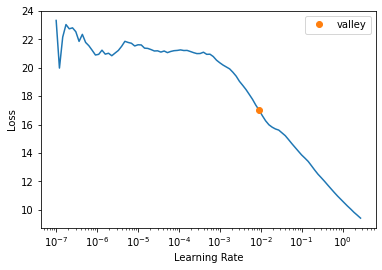

<Figure size 720x720 with 0 Axes>

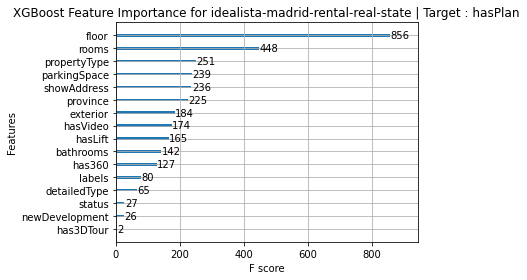

Target Variable: priceByArea
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'district', 'neighborhood']
31
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms',

 12%|█▏        | 5/42 [00:00<00:00, 48.14it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5198977836434454, 'Adjusted R-Squared': 0.34736104964030856, 'RMSE': 4.175332463512403, 'Time taken': 0.03391742706298828}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5013303194269717, 'Adjusted R-Squared': 0.3221209029710397, 'RMSE': 4.255304949706145, 'Time taken': 0.035567283630371094}
{'Model': 'BayesianRidge', 'R-Squared': 0.5606415310477975, 'Adjusted R-Squared': 0.40274708126809966, 'RMSE': 3.99423587285895, 'Time taken': 0.011658191680908203}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.2820528763065473, 'Adjusted R-Squared': 0.024040628729212754, 'RMSE': 5.105878037155121, 'Time taken': 0.011876344680786133}
{'Model': 'DummyRegressor', 'R-Squared': -0.009221031481537079, 'Adjusted R-Squared': -0.3719098396702145, 'RMSE': 6.053651, 'Time taken': 0.01039266586303711}
{'Model': 'ElasticNet', 'R-Squared': 0.46267589593317926, 'Adjusted R-Squared': 0.2695750460341656, 'RMSE': 4.417152246049764, 'Time taken': 0.012848138809204102}


 31%|███       | 13/42 [00:00<00:01, 20.42it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.4852055331551175, 'Adjusted R-Squared': 0.3002012716327378, 'RMSE': 4.323556532103049, 'Time taken': 0.01651310920715332}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.1855538503735166, 'Adjusted R-Squared': -1.970987265351499, 'RMSE': 8.908507758444058, 'Time taken': 0.03471803665161133}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4796195113819919, 'Adjusted R-Squared': 0.2926077732848952, 'RMSE': 4.346950642536728, 'Time taken': 0.024578571319580078}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5780704159803984, 'Adjusted R-Squared': 0.42643947172335417, 'RMSE': 3.914210660869473, 'Time taken': 0.11365818977355957}


 43%|████▎     | 18/42 [00:01<00:01, 14.85it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5718565577477859, 'Adjusted R-Squared': 0.4179925081883964, 'RMSE': 3.942928075091846, 'Time taken': 0.29627108573913574}
{'Model': 'HuberRegressor', 'R-Squared': 0.57180732591786, 'Adjusted R-Squared': 0.41792558366959087, 'RMSE': 3.9431547654544863, 'Time taken': 0.024616241455078125}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4220394837564807, 'Adjusted R-Squared': 0.21433492323146597, 'RMSE': 4.581137, 'Time taken': 0.015925168991088867}
{'Model': 'KernelRidge', 'R-Squared': -3.3967919910883335, 'Adjusted R-Squared': -4.976889112885703, 'RMSE': 12.63549227944207, 'Time taken': 0.05875205993652344}
{'Model': 'Lars', 'R-Squared': 0.5607179153259927, 'Adjusted R-Squared': 0.40285091614627133, 'RMSE': 3.9938886505935476, 'Time taken': 0.050446510314941406}


 50%|█████     | 21/42 [00:01<00:01, 15.70it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5564450958549589, 'Adjusted R-Squared': 0.3970425521778348, 'RMSE': 4.01326557139445, 'Time taken': 0.07196640968322754}
{'Model': 'Lasso', 'R-Squared': 0.45479154088877083, 'Adjusted R-Squared': 0.2588572508956728, 'RMSE': 4.4494414826352635, 'Time taken': 0.013695001602172852}
{'Model': 'LassoCV', 'R-Squared': 0.5566505390196044, 'Adjusted R-Squared': 0.39732182647977465, 'RMSE': 4.012336043318559, 'Time taken': 0.07958841323852539}
{'Model': 'LassoLars', 'R-Squared': -0.009221041658660445, 'Adjusted R-Squared': -0.3719098535047416, 'RMSE': 6.053650656258876, 'Time taken': 0.015272855758666992}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5564450958549589, 'Adjusted R-Squared': 0.3970425521778348, 'RMSE': 4.01326557139445, 'Time taken': 0.04143667221069336}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5477658473755327, 'Adjusted R-Squared': 0.3852441987761147, 'RMSE': 4.052340082327883, 'Time taken': 0.017916440963745117}
{'Model': 'LinearRegression', 'R-Squa

 62%|██████▏   | 26/42 [00:01<00:00, 21.82it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.582936157919101, 'Adjusted R-Squared': 0.433053839671278, 'RMSE': 3.8915756437315308, 'Time taken': 0.02658843994140625}


 69%|██████▉   | 29/42 [00:03<00:03,  4.31it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5020494772302393, 'Adjusted R-Squared': 0.3230985081098565, 'RMSE': 4.252235442969309, 'Time taken': 2.088015556335449}
{'Model': 'NuSVR', 'R-Squared': 0.43447663652963175, 'Adjusted R-Squared': 0.23124167778246818, 'RMSE': 4.531578238471702, 'Time taken': 0.04669904708862305}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.47634959977472446, 'Adjusted R-Squared': 0.28816273719376606, 'RMSE': 4.360586708089991, 'Time taken': 0.024959087371826172}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5355199922967271, 'Adjusted R-Squared': 0.36859748952836335, 'RMSE': 4.10683939718234, 'Time taken': 0.03701472282409668}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.3584695302493198, 'Adjusted R-Squared': 0.12791951768266918, 'RMSE': 4.826506004715685, 'Time taken': 0.012681245803833008}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5601142125057538, 'Adjusted R-Squared': 0.402030257625009, 'RMSE': 3.996632097341353, 'Time taken': 

 79%|███████▊  | 33/42 [00:03<00:01,  6.04it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.4105993605633603, 'Adjusted R-Squared': 0.19878350576581794, 'RMSE': 4.6262543672041225, 'Time taken': 0.09084177017211914}


 98%|█████████▊| 41/42 [00:04<00:00, 10.20it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5367598621239461, 'Adjusted R-Squared': 0.3702829375747393, 'RMSE': 4.101354393751995, 'Time taken': 0.21676421165466309}
{'Model': 'Ridge', 'R-Squared': 0.5607873934040596, 'Adjusted R-Squared': 0.40294536290864347, 'RMSE': 3.993572795827256, 'Time taken': 0.01321864128112793}
{'Model': 'RidgeCV', 'R-Squared': 0.5610323078888457, 'Adjusted R-Squared': 0.40327829353639966, 'RMSE': 3.9924591891168855, 'Time taken': 0.012903213500976562}
{'Model': 'SGDRegressor', 'R-Squared': 0.5619178506217787, 'Adjusted R-Squared': 0.4044820781889804, 'RMSE': 3.988430102067859, 'Time taken': 0.013853073120117188}
{'Model': 'SVR', 'R-Squared': 0.41999313414394046, 'Adjusted R-Squared': 0.21155316672691904, 'RMSE': 4.5892400398348885, 'Time taken': 0.023832082748413086}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5607179153259926, 'Adjusted R-Squared': 0.4028509161462711, 'RMSE': 3.993888650593548, 'Time taken': 0.012956380844116211}
{'Model': 

100%|██████████| 42/42 [00:04<00:00, 10.24it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.5735349575036941, 'Adjusted R-Squared': 0.4202740828565842, 'RMSE': 3.935191990217454, 'Time taken': 0.06350207328796387}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: priceByArea
priceByArea
Target Standard Deviation: 5.223031520843506
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearSVR                                    0.43       0.58  3.89        0.03
GradientBoostingRegressor                    0.43       0.58  3.91        0.11
LGBMRegressor                                0.42       0.57  3.94        0.06
HistGradientBoostingRegressor                0.42       0.57  3.94        0.30
HuberRegressor                               0.42       0.57  3.94        0.02
SGDRegressor                                 0.40       0.56  3.99        0.01
RidgeCV                                      0.4

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,171.583847,172.740875,13.143092,00:00
1,124.500183,98.313309,9.915307,00:00
2,103.168938,58.258167,7.632704,00:00
3,84.736923,93.977631,9.694206,00:00


Better model found at epoch 0 with _rmse value: 13.143092155456543.
Better model found at epoch 1 with _rmse value: 9.91530704498291.
Better model found at epoch 2 with _rmse value: 7.63270378112793.
No improvement since epoch 2: early stopping


,propertyType,operation,exterior,rooms,bathrooms,province,country,showAddress,hasVideo,status,newDevelopment,detailedType,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,floor,hasLift,parkingSpace,labels,newDevelopmentFinished,priceByArea,priceByArea_pred
0,4.00,1.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,11.00,7.57
1,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,10.00,7.86
2,4.00,1.00,2.00,2.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,1.00,1.00,1.00,1.00,8.00,7.47
3,4.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,10.00,7.89
4,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,11.00,7.85
5,4.00,1.00,2.00,3.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,6.00,1.00,1.00,10.00,7.58
6,4.00,1.00,2.00,3.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,9.00,7.46
7,4.00,1.00,1.00,3.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,11.00,7.86
8,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,7.75


<Figure size 432x288 with 0 Axes>

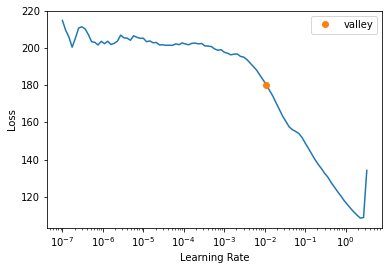

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    7.00      14.90
1   23.00      12.87
2   11.00      12.04
3   13.00      13.27
4    7.00      15.14
XGBoost RMSE:  4.210186


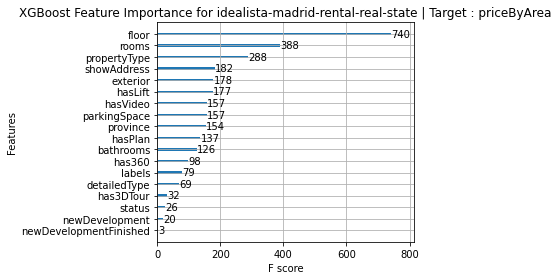

Target Variable: newDevelopment
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01885533332824707}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.031209945678710938}
{'Model': 'BayesianRidge', 'R-Squared': 0.8551445610577576, 'Adjusted R-Squared': 0.8061165663388448, 'RMSE': 0.06906449193143976, 'Time taken': 0.012111425399780273}


 14%|█▍        | 6/42 [00:00<00:00, 59.47it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.013073921203613281}
{'Model': 'DummyRegressor', 'R-Squared': -0.0010365638802365407, 'Adjusted R-Squared': -0.33984893934739335, 'RMSE': 0.1815567452038367, 'Time taken': 0.011243820190429688}
{'Model': 'ElasticNet', 'R-Squared': -0.0010365638802365407, 'Adjusted R-Squared': -0.33984893934739335, 'RMSE': 0.1815567452038367, 'Time taken': 0.013509273529052734}
{'Model': 'ElasticNetCV', 'R-Squared': 0.8395376338895283, 'Adjusted R-Squared': 0.7852272945905994, 'RMSE': 0.07268989039098203, 'Time taken': 0.07501626014709473}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.012267589569091797}


 29%|██▊       | 12/42 [00:00<00:01, 25.68it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11973977088928223}
{'Model': 'GammaRegressor', 'R-Squared': 0.6942747615052063, 'Adjusted R-Squared': 0.5907985269377376, 'RMSE': 0.10033514076399007, 'Time taken': 0.013666391372680664}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.335404747983695, 'Adjusted R-Squared': -10.156618662685869, 'RMSE': 0.5239028543217803, 'Time taken': 0.049247026443481445}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7225061372314243, 'Adjusted R-Squared': 0.6285851375251372, 'RMSE': 0.09559036266080555, 'Time taken': 0.054121971130371094}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992937608, 'Adjusted R-Squared': 0.999999999054726, 'RMSE': 4.822401130065989e-06, 'Time taken': 0.10308718681335449}


 38%|███▊      | 16/42 [00:00<00:01, 15.59it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9210735294341585, 'Adjusted R-Squared': 0.8943599547811045, 'RMSE': 0.05097987418164789, 'Time taken': 0.23914098739624023}
{'Model': 'HuberRegressor', 'R-Squared': 0.9203539033989706, 'Adjusted R-Squared': 0.8933967630109299, 'RMSE': 0.05121175582891475, 'Time taken': 0.07331562042236328}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9861960784313726, 'Adjusted R-Squared': 0.9815239819004525, 'RMSE': 0.021320071635561037, 'Time taken': 0.014891624450683594}
{'Model': 'KernelRidge', 'R-Squared': -31.751404896153566, 'Adjusted R-Squared': -42.836495784082466, 'RMSE': 1.0384901583314776, 'Time taken': 0.07935166358947754}


 52%|█████▏    | 22/42 [00:01<00:01, 17.15it/s]

{'Model': 'Lars', 'R-Squared': 0.8564060062190427, 'Adjusted R-Squared': 0.8078049621701033, 'RMSE': 0.06876311709403243, 'Time taken': 0.06663250923156738}
{'Model': 'LarsCV', 'R-Squared': 0.8371101083867687, 'Adjusted R-Squared': 0.7819781450715212, 'RMSE': 0.07323766428702344, 'Time taken': 0.07021522521972656}
{'Model': 'Lasso', 'R-Squared': -0.0010365638802365407, 'Adjusted R-Squared': -0.33984893934739335, 'RMSE': 0.1815567452038367, 'Time taken': 0.014391183853149414}
{'Model': 'LassoCV', 'R-Squared': 0.8403476594787761, 'Adjusted R-Squared': 0.7863114826869773, 'RMSE': 0.07250618635699396, 'Time taken': 0.07882261276245117}
{'Model': 'LassoLars', 'R-Squared': -0.0010365638802365407, 'Adjusted R-Squared': -0.33984893934739335, 'RMSE': 0.1815567452038367, 'Time taken': 0.013117790222167969}
{'Model': 'LassoLarsCV', 'R-Squared': 0.8371101083867687, 'Adjusted R-Squared': 0.7819781450715212, 'RMSE': 0.07323766428702344, 'Time taken': 0.04071831703186035}
{'Model': 'LassoLarsIC', 'R-

 69%|██████▉   | 29/42 [00:02<00:01,  7.10it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.523163026966997, 'Adjusted R-Squared': 0.3617720514789038, 'RMSE': 0.1253061478849108, 'Time taken': 1.4416577816009521}
{'Model': 'NuSVR', 'R-Squared': 0.9988829041606695, 'Adjusted R-Squared': 0.9985048101842807, 'RMSE': 0.0060650255563035466, 'Time taken': 0.10637569427490234}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8467751957177363, 'Adjusted R-Squared': 0.7949144927298932, 'RMSE': 0.07103165861295214, 'Time taken': 0.012964725494384766}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8493258625598068, 'Adjusted R-Squared': 0.7983284621954337, 'RMSE': 0.07043796088460215, 'Time taken': 0.01919698715209961}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7859786894660721, 'Adjusted R-Squared': 0.7135407074392042, 'RMSE': 0.08394907740024438, 'Time taken': 0.012238025665283203}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7553774007246794, 'Adjusted R-Squared': 0.672582059431494, 'RMSE': 0.0897502581311514, 'Time t

 86%|████████▌ | 36/42 [00:03<00:00, 10.93it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999654901960784, 'Adjusted R-Squared': 0.999953809954751, 'RMSE': 0.001066003581778053, 'Time taken': 0.1556077003479004}
{'Model': 'Ridge', 'R-Squared': 0.8563029429163376, 'Adjusted R-Squared': 0.8076670159034057, 'RMSE': 0.06878778972334014, 'Time taken': 0.010812759399414062}
{'Model': 'RidgeCV', 'R-Squared': 0.8551190702042185, 'Adjusted R-Squared': 0.8060824478118002, 'RMSE': 0.06907056845648064, 'Time taken': 0.011217594146728516}
{'Model': 'SGDRegressor', 'R-Squared': 0.8530674613701663, 'Adjusted R-Squared': 0.8033364482954534, 'RMSE': 0.06955789155597483, 'Time taken': 0.013076543807983398}


100%|██████████| 42/42 [00:03<00:00, 12.68it/s]


{'Model': 'SVR', 'R-Squared': 0.7824893197278142, 'Adjusted R-Squared': 0.7088703202510744, 'RMSE': 0.08463065680933392, 'Time taken': 0.013986587524414062}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8564060062190433, 'Adjusted R-Squared': 0.8078049621701041, 'RMSE': 0.06876311709403231, 'Time taken': 0.013503789901733398}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7225061372314243, 'Adjusted R-Squared': 0.6285851375251372, 'RMSE': 0.09559036266080555, 'Time taken': 0.011401176452636719}
{'Model': 'XGBRegressor', 'R-Squared': 0.9999998762273667, 'Adjusted R-Squared': 0.9999998343350909, 'RMSE': 6.384101e-05, 'Time taken': 0.03184223175048828}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9211357916996825, 'Adjusted R-Squared': 0.8944432904288059, 'RMSE': 0.050959762116108746, 'Time taken': 0.05438518524169922}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: newDevelopment
newDevelopment
Target Standard Deviation: 0.16568224066231843
    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.129719,0.540755,0.735361,00:00
1,4.081961,0.840110,0.916575,00:00


Better model found at epoch 0 with _rmse value: 0.7353606820106506.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  6.384101e-05


<Figure size 432x288 with 0 Axes>

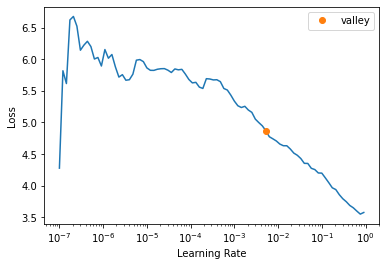

<Figure size 720x720 with 0 Axes>

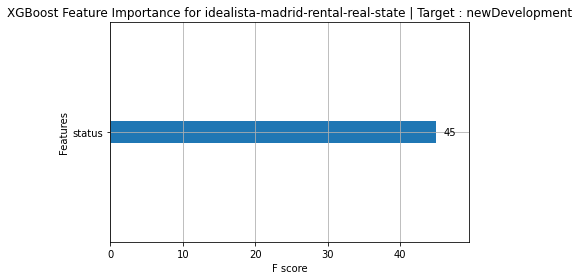

Target Variable: hasVideo
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exter

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.22692956561113486, 'Adjusted R-Squared': -0.03472504295125023, 'RMSE': 0.39652186396930234, 'Time taken': 0.028813838958740234}


 14%|█▍        | 6/42 [00:00<00:00, 55.47it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.17149284303350965, 'Adjusted R-Squared': -0.10892496393976403, 'RMSE': 0.4104929843671466, 'Time taken': 0.0352025032043457}
{'Model': 'BayesianRidge', 'R-Squared': 0.3092017761104138, 'Adjusted R-Squared': 0.07539314648624618, 'RMSE': 0.374829024836358, 'Time taken': 0.011958599090576172}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.05460317460317454, 'Adjusted R-Squared': -0.4115457875457873, 'RMSE': 0.46312917891624616, 'Time taken': 0.011002779006958008}
{'Model': 'DummyRegressor', 'R-Squared': -0.0004995422365907665, 'Adjusted R-Squared': -0.33913015653205214, 'RMSE': 0.451092964912583, 'Time taken': 0.009899139404296875}
{'Model': 'ElasticNet', 'R-Squared': -0.0004995422365907665, 'Adjusted R-Squared': -0.33913015653205214, 'RMSE': 0.451092964912583, 'Time taken': 0.010788917541503906}
{'Model': 'ElasticNetCV', 'R-Squared': 0.3339847739937237, 'Adjusted R-Squared': 0.10856423596083031, 'RMSE': 0.36804395233055065, 'Time taken': 0

 29%|██▊       | 12/42 [00:00<00:01, 24.47it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.09265710405643746, 'Adjusted R-Squared': -0.21444356841676826, 'RMSE': 0.4295792827455037, 'Time taken': 0.15439891815185547}
{'Model': 'GammaRegressor', 'R-Squared': 0.297038694472724, 'Adjusted R-Squared': 0.05911332952503068, 'RMSE': 0.37811448677507203, 'Time taken': 0.013600826263427734}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.3596529665031976, 'Adjusted R-Squared': -3.496766278242741, 'RMSE': 0.8266179212850298, 'Time taken': 0.036943912506103516}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.29856919568954177, 'Adjusted R-Squared': 0.061161846538309805, 'RMSE': 0.3777026433259839, 'Time taken': 0.050902605056762695}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3156648157189068, 'Adjusted R-Squared': 0.08404367642376764, 'RMSE': 0.3730714727312279, 'Time taken': 0.10999703407287598}


 38%|███▊      | 16/42 [00:00<00:01, 14.60it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.27742196087001525, 'Adjusted R-Squared': 0.032857086087558884, 'RMSE': 0.3833539884067887, 'Time taken': 0.26877331733703613}
{'Model': 'HuberRegressor', 'R-Squared': 0.24189007813957475, 'Adjusted R-Squared': -0.014700972336261442, 'RMSE': 0.39266636057806, 'Time taken': 0.07160472869873047}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.24012698412698408, 'Adjusted R-Squared': -0.01706080586080594, 'RMSE': 0.3931226965534483, 'Time taken': 0.014934539794921875}
{'Model': 'KernelRidge', 'R-Squared': -8.301968592344666, 'Adjusted R-Squared': -11.450327192830553, 'RMSE': 1.3754507400272782, 'Time taken': 0.03412580490112305}
{'Model': 'Lars', 'R-Squared': 0.3025400434796818, 'Adjusted R-Squared': 0.06647667358049725, 'RMSE': 0.376632025708372, 'Time taken': 0.053412675857543945}


 52%|█████▏    | 22/42 [00:01<00:01, 17.81it/s]

{'Model': 'LarsCV', 'R-Squared': 0.33551930241593964, 'Adjusted R-Squared': 0.11061814323364239, 'RMSE': 0.367619713082924, 'Time taken': 0.07367730140686035}
{'Model': 'Lasso', 'R-Squared': -0.0004995422365907665, 'Adjusted R-Squared': -0.33913015653205214, 'RMSE': 0.451092964912583, 'Time taken': 0.012244224548339844}
{'Model': 'LassoCV', 'R-Squared': 0.33375452407311923, 'Adjusted R-Squared': 0.1082560552978673, 'RMSE': 0.3681075655668971, 'Time taken': 0.07582378387451172}
{'Model': 'LassoLars', 'R-Squared': -0.0004995422365907665, 'Adjusted R-Squared': -0.33913015653205214, 'RMSE': 0.451092964912583, 'Time taken': 0.013231277465820312}
{'Model': 'LassoLarsCV', 'R-Squared': 0.33551930241593964, 'Adjusted R-Squared': 0.11061814323364239, 'RMSE': 0.367619713082924, 'Time taken': 0.041495323181152344}
{'Model': 'LassoLarsIC', 'R-Squared': 0.33503868298910966, 'Adjusted R-Squared': 0.109974852616193, 'RMSE': 0.36775263886906956, 'Time taken': 0.017836332321166992}
{'Model': 'LinearRegr

 69%|██████▉   | 29/42 [00:03<00:02,  6.09it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0921430291522436, 'Adjusted R-Squared': -0.2151316379039201, 'RMSE': 0.42970095926857643, 'Time taken': 1.7424049377441406}
{'Model': 'NuSVR', 'R-Squared': 0.184564363558256, 'Adjusted R-Squared': -0.09142923646818035, 'RMSE': 0.407241895804976, 'Time taken': 0.16206860542297363}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.32866378427112564, 'Adjusted R-Squared': 0.10144229587058362, 'RMSE': 0.36951123272107395, 'Time taken': 0.011108636856079102}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3163162964136126, 'Adjusted R-Squared': 0.08491565827668157, 'RMSE': 0.3728938501710957, 'Time taken': 0.017717599868774414}


 79%|███████▊  | 33/42 [00:03<00:01,  8.51it/s]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.1870628721555616, 'Adjusted R-Squared': -0.5888379981159055, 'RMSE': 0.49135396819563526, 'Time taken': 0.013951778411865234}
{'Model': 'PoissonRegressor', 'R-Squared': 0.318606910048543, 'Adjusted R-Squared': 0.08798155652651152, 'RMSE': 0.37226865435694206, 'Time taken': 0.013493776321411133}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 98%|█████████▊| 41/42 [00:03<00:00, 13.48it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.22495883820969664, 'Adjusted R-Squared': -0.0373627857808676, 'RMSE': 0.39702695321345716, 'Time taken': 0.18894028663635254}
{'Model': 'Ridge', 'R-Squared': 0.30289353328055635, 'Adjusted R-Squared': 0.06694980608320622, 'RMSE': 0.3765365704410869, 'Time taken': 0.013218164443969727}
{'Model': 'RidgeCV', 'R-Squared': 0.3058265157196496, 'Adjusted R-Squared': 0.07087549027091566, 'RMSE': 0.37574362181740456, 'Time taken': 0.011519670486450195}
{'Model': 'SGDRegressor', 'R-Squared': 0.30309797709494735, 'Adjusted R-Squared': 0.067223446265545, 'RMSE': 0.3764813520337568, 'Time taken': 0.01294398307800293}
{'Model': 'SVR', 'R-Squared': 0.17978768510672294, 'Adjusted R-Squared': -0.09782263685715531, 'RMSE': 0.40843292981295337, 'Time taken': 0.020712614059448242}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3025400434796812, 'Adjusted R-Squared': 0.06647667358049647, 'RMSE': 0.3766320257083722, 'Time taken': 0.011156082153320312

100%|██████████| 42/42 [00:03<00:00, 11.17it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.2840865922945779, 'Adjusted R-Squared': 0.04177743891735819, 'RMSE': 0.3815819779966335, 'Time taken': 0.08365941047668457}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: hasVideo
hasVideo
Target Standard Deviation: 0.4460146939473581
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LarsCV                                       0.11       0.34  0.37        0.07
LassoLarsCV                                  0.11       0.34  0.37        0.04
LassoLarsIC                                  0.11       0.34  0.37        0.02
ElasticNetCV                                 0.11       0.33  0.37        0.07
LassoCV                                      0.11       0.33  0.37        0.08
OrthogonalMatchingPursuit                    0.10       0.33  0.37        0.01
PoissonRegressor                             0.09  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.644073,3.630435,1.905370,00:00
1,6.709592,2.432911,1.559779,00:00
2,5.517931,0.375713,0.612954,00:00
3,5.106210,0.291124,0.539559,00:00
4,4.253518,0.371788,0.609744,00:00


Better model found at epoch 0 with _rmse value: 1.9053698778152466.
Better model found at epoch 1 with _rmse value: 1.559779167175293.
Better model found at epoch 2 with _rmse value: 0.6129540205001831.
Better model found at epoch 3 with _rmse value: 0.5395585894584656.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.86
1       1       1.10
2       1       1.18
3       1       1.52
4       1       1.17
XGBoost RMSE:  0.44355872


<Figure size 432x288 with 0 Axes>

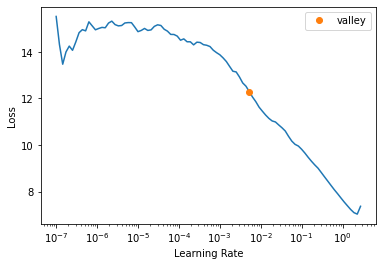

<Figure size 720x720 with 0 Axes>

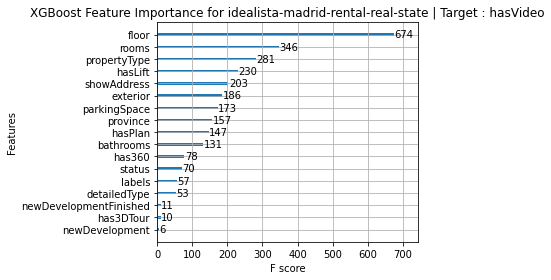

Target Variable: distance
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'priceByArea', 'district', 'neighborhood']
31
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathroom

 10%|▉         | 4/42 [00:00<00:00, 38.01it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5261628022083873, 'Adjusted R-Squared': 0.35587755925202647, 'RMSE': 12300.7459725179, 'Time taken': 0.037271976470947266}
{'Model': 'BaggingRegressor', 'R-Squared': 0.38304162349598303, 'Adjusted R-Squared': 0.1613222069398519, 'RMSE': 14036.046770783534, 'Time taken': 0.039594411849975586}
{'Model': 'BayesianRidge', 'R-Squared': 0.43017684336213025, 'Adjusted R-Squared': 0.2253966464453958, 'RMSE': 13489.222593963626, 'Time taken': 0.014895915985107422}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.190848482731098, 'Adjusted R-Squared': -0.09994034378741357, 'RMSE': 16074.290048458528, 'Time taken': 0.01307821273803711}
{'Model': 'DummyRegressor', 'R-Squared': -0.006013797264747822, 'Adjusted R-Squared': -0.36755000565676665, 'RMSE': 17923.336, 'Time taken': 0.011921405792236328}
{'Model': 'ElasticNet', 'R-Squared': 0.43113324043976176, 'Adjusted R-Squared': 0.2266967487228011, 'RMSE': 13477.897614642492, 'Time taken': 0.0123345851898

 19%|█▉        | 8/42 [00:00<00:00, 35.79it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.17000538250841712, 'Adjusted R-Squared': -0.12827393315262037, 'RMSE': 16280.0041837248, 'Time taken': 0.07601165771484375}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.2323294572758129, 'Adjusted R-Squared': -0.04355214401569185, 'RMSE': 15656.847164334005, 'Time taken': 0.01419830322265625}


 29%|██▊       | 12/42 [00:00<00:01, 21.34it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.34911529391768203, 'Adjusted R-Squared': 0.11520360266934904, 'RMSE': 14416.801128750014, 'Time taken': 0.1941215991973877}
{'Model': 'GammaRegressor', 'R-Squared': 0.377957555782619, 'Adjusted R-Squared': 0.1544110523919977, 'RMSE': 14093.760391303655, 'Time taken': 0.013857126235961914}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.122401977391854, 'Adjusted R-Squared': -1.8851401880170515, 'RMSE': 26033.388230472487, 'Time taken': 0.03879880905151367}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4065267345868805, 'Adjusted R-Squared': 0.19324727982904066, 'RMSE': 13766.30711423849, 'Time taken': 0.028632640838623047}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5021202243986509, 'Adjusted R-Squared': 0.3231946800419161, 'RMSE': 12608.955637469593, 'Time taken': 0.1386876106262207}


 43%|████▎     | 18/42 [00:01<00:01, 14.75it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5080615743924968, 'Adjusted R-Squared': 0.33127120268980026, 'RMSE': 12533.496601747269, 'Time taken': 0.2888026237487793}
{'Model': 'HuberRegressor', 'R-Squared': 0.36819978272400733, 'Adjusted R-Squared': 0.1411465796404474, 'RMSE': 14203.872316601517, 'Time taken': 0.02405405044555664}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4838211742542132, 'Adjusted R-Squared': 0.29831940875182106, 'RMSE': 12838.579, 'Time taken': 0.01571941375732422}
{'Model': 'KernelRidge', 'R-Squared': -1.3629569434907594, 'Adjusted R-Squared': -2.212144595057751, 'RMSE': 27469.122003957586, 'Time taken': 0.03561806678771973}
{'Model': 'Lars', 'R-Squared': 0.4167929001759514, 'Adjusted R-Squared': 0.20720284867668393, 'RMSE': 13646.719825312792, 'Time taken': 0.06389665603637695}


 62%|██████▏   | 26/42 [00:01<00:00, 21.77it/s]

{'Model': 'LarsCV', 'R-Squared': 0.425433000034127, 'Adjusted R-Squared': 0.2189479844213914, 'RMSE': 13545.25587969819, 'Time taken': 0.0707559585571289}
{'Model': 'Lasso', 'R-Squared': 0.41689251519762405, 'Adjusted R-Squared': 0.20733826284677015, 'RMSE': 13645.5543076557, 'Time taken': 0.013858318328857422}
{'Model': 'LassoCV', 'R-Squared': 0.42553376152369726, 'Adjusted R-Squared': 0.21908495707127595, 'RMSE': 13544.068115693133, 'Time taken': 0.08170056343078613}
{'Model': 'LassoLars', 'R-Squared': 0.4186350692958902, 'Adjusted R-Squared': 0.20970704732410073, 'RMSE': 13625.149915341639, 'Time taken': 0.017181873321533203}
{'Model': 'LassoLarsCV', 'R-Squared': 0.425433000034127, 'Adjusted R-Squared': 0.2189479844213914, 'RMSE': 13545.25587969819, 'Time taken': 0.04004955291748047}
{'Model': 'LassoLarsIC', 'R-Squared': 0.42381282084732186, 'Adjusted R-Squared': 0.2167455533393281, 'RMSE': 13564.340070607439, 'Time taken': 0.01747608184814453}
{'Model': 'LinearRegression', 'R-Squar

 69%|██████▉   | 29/42 [00:03<00:03,  4.19it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.6919450207117626, 'Adjusted R-Squared': -2.659362762530052, 'RMSE': 29319.054923246003, 'Time taken': 2.2243099212646484}
{'Model': 'NuSVR', 'R-Squared': -0.02462112831099761, 'Adjusted R-Squared': -0.39284434629776244, 'RMSE': 18088.33229475949, 'Time taken': 0.04307985305786133}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2543034684176795, 'Adjusted R-Squared': -0.013681222619716937, 'RMSE': 15431.137309020463, 'Time taken': 0.023853540420532227}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.41560979615989924, 'Adjusted R-Squared': 0.20559456665486298, 'RMSE': 13660.554798409328, 'Time taken': 0.03784966468811035}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.31857054868825174, 'Adjusted R-Squared': 0.07368183962309216, 'RMSE': 14751.19907467119, 'Time taken': 0.0362706184387207}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3430154993167046, 'Adjusted R-Squared': 0.10691169438364534, 'RMSE': 14484.197437489172, 'T

 79%|███████▊  | 33/42 [00:03<00:01,  5.77it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.2735598748802569, 'Adjusted R-Squared': 0.012495454915349202, 'RMSE': 15230.59207450756, 'Time taken': 0.08861207962036133}


 98%|█████████▊| 41/42 [00:04<00:00,  9.75it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.44961808990462404, 'Adjusted R-Squared': 0.25182459096409826, 'RMSE': 13257.112744060329, 'Time taken': 0.22184491157531738}
{'Model': 'Ridge', 'R-Squared': 0.41735905119162986, 'Adjusted R-Squared': 0.2079724602136218, 'RMSE': 13640.094408509121, 'Time taken': 0.012252092361450195}
{'Model': 'RidgeCV', 'R-Squared': 0.42177422076426074, 'Adjusted R-Squared': 0.21397433135141697, 'RMSE': 13588.31478745435, 'Time taken': 0.012018203735351562}
{'Model': 'SGDRegressor', 'R-Squared': 0.41852053818784585, 'Adjusted R-Squared': 0.20955135659910296, 'RMSE': 13626.491952490722, 'Time taken': 0.01527857780456543}
{'Model': 'SVR', 'R-Squared': -0.04325899738166994, 'Adjusted R-Squared': -0.4181801995657075, 'RMSE': 18252.10437419271, 'Time taken': 0.02322220802307129}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4167929001759516, 'Adjusted R-Squared': 0.20720284867668426, 'RMSE': 13646.71982531279, 'Time taken': 0.012711048126220703}
{'M

100%|██████████| 42/42 [00:04<00:00,  9.79it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4994556927092193, 'Adjusted R-Squared': 0.319572582276595, 'RMSE': 12642.650650499621, 'Time taken': 0.06742048263549805}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: distance
distance
Target Standard Deviation: 16730.001953125
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
AdaBoostRegressor                            0.36       0.53 12300.75   
HistGradientBoostingRegressor                0.33       0.51 12533.50   
GradientBoostingRegressor                    0.32       0.50 12608.96   
LGBMRegressor                                0.32       0.50 12642.65   
KNeighborsRegressor                          0.30       0.48 12838.58   
RandomForestRegressor                        0.25       0.45 13257.11   
ElasticNet                                   0.23       0.43 13477.90   
BayesianRidge                  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,736776384.000000,865727424.000000,29423.246094,00:00
1,756345792.000000,865452992.000000,29418.582031,00:00
2,756404608.000000,863825088.000000,29390.898438,00:00
3,753780800.000000,854352640.000000,29229.312500,00:00
4,758145088.000000,815431296.000000,28555.757812,00:00
5,746868608.000000,754670144.000000,27471.259766,00:00
6,732550656.000000,675075072.000000,25982.207031,00:00
7,706839552.000000,453445760.000000,21294.265625,00:00
8,678297024.000000,351442560.000000,18746.800781,00:00
9,643793024.000000,392924704.000000,19822.328125,00:00


Better model found at epoch 0 with _rmse value: 29423.24609375.
Better model found at epoch 1 with _rmse value: 29418.58203125.
Better model found at epoch 2 with _rmse value: 29390.8984375.
Better model found at epoch 3 with _rmse value: 29229.3125.
Better model found at epoch 4 with _rmse value: 28555.7578125.
Better model found at epoch 5 with _rmse value: 27471.259765625.
Better model found at epoch 6 with _rmse value: 25982.20703125.
Better model found at epoch 7 with _rmse value: 21294.265625.
Better model found at epoch 8 with _rmse value: 18746.80078125.
No improvement since epoch 8: early stopping


,propertyType,operation,exterior,rooms,bathrooms,province,country,showAddress,hasVideo,status,newDevelopment,detailedType,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,floor,hasLift,parkingSpace,labels,newDevelopmentFinished,distance,distance_pred
0,3.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,7.00,2.00,1.00,2.00,1.00,1.00,1.00,11.00,2.00,1.00,1.00,1.00,5627.00,19433.33
1,4.00,1.00,2.00,2.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,6.00,1.00,1.00,58969.00,24177.61
2,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,20804.00,17936.63
3,3.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,7.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,23917.00,24198.81
4,4.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,1.00,1.00,2.00,1.00,13887.00,19912.83
5,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,4538.00,19061.85
6,4.00,1.00,2.00,3.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,6.00,1.00,2.00,20294.00,17924.82
7,4.00,1.00,2.00,2.00,1.00,4.00,1.00,2.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,6.00,1.00,1.00,55947.00,17915.23
8,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,7841.00,24198.81


<Figure size 432x288 with 0 Axes>

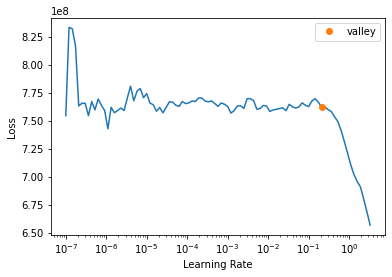

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
    actual  predicted
0 35627.00   35371.41
1 10656.00   11048.15
2  3161.00   25111.48
3 12383.00   11528.95
4  7841.00   23414.38
XGBoost RMSE:  13989.25


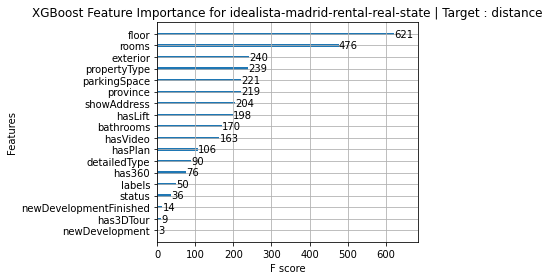

Target Variable: showAddress
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'ex

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.009766834759846743, 'Adjusted R-Squared': -0.3515340711401025, 'RMSE': 0.4283264835516997, 'Time taken': 0.038008689880371094}


 12%|█▏        | 5/42 [00:00<00:00, 45.95it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.30280593568951786, 'Adjusted R-Squared': -0.7437556369998162, 'RMSE': 0.48652396883549326, 'Time taken': 0.03643012046813965}
{'Model': 'BayesianRidge', 'R-Squared': -0.013018622710423422, 'Adjusted R-Squared': -0.35588646424318204, 'RMSE': 0.42901560667878097, 'Time taken': 0.013088464736938477}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.9975124378109455, 'Adjusted R-Squared': -1.673593570608496, 'RMSE': 0.6024335119858758, 'Time taken': 0.011168718338012695}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005310583374016353, 'Adjusted R-Squared': -0.3391723396208297, 'RMSE': 0.426363151634114, 'Time taken': 0.009696722030639648}
{'Model': 'ElasticNet', 'R-Squared': -0.0005310583374016353, 'Adjusted R-Squared': -0.3391723396208297, 'RMSE': 0.426363151634114, 'Time taken': 0.014261007308959961}
{'Model': 'ElasticNetCV', 'R-Squared': -0.06851405694679569, 'Adjusted R-Squared': -0.43016496852878805, 'RMSE': 0.4406101490850778, 'Time take

 24%|██▍       | 10/42 [00:00<00:01, 23.87it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.39045455263365736, 'Adjusted R-Squared': -0.861069939678895, 'RMSE': 0.5026234834959625, 'Time taken': 0.15993833541870117}
{'Model': 'GammaRegressor', 'R-Squared': 0.023867089950713738, 'Adjusted R-Squared': -0.3065163565275062, 'RMSE': 0.42113259277480475, 'Time taken': 0.016293048858642578}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.9396682058109835, 'Adjusted R-Squared': -4.2730943677777775, 'RMSE': 0.846046436078446, 'Time taken': 0.0425114631652832}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.026715071352144126, 'Adjusted R-Squared': -0.3027044429594379, 'RMSE': 0.4205177923265112, 'Time taken': 0.047486305236816406}


 31%|███       | 13/42 [00:00<00:01, 19.45it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.0410894971383966, 'Adjusted R-Squared': -0.39345825001600776, 'RMSE': 0.43491902840626634, 'Time taken': 0.11902761459350586}


 43%|████▎     | 18/42 [00:01<00:01, 15.09it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.12322666934274507, 'Adjusted R-Squared': -0.5033956958895203, 'RMSE': 0.451749915355171, 'Time taken': 0.24901318550109863}
{'Model': 'HuberRegressor', 'R-Squared': -0.32054878002386933, 'Adjusted R-Squared': -0.7675037517242558, 'RMSE': 0.48982573715099376, 'Time taken': 0.06871318817138672}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.10828713574982252, 'Adjusted R-Squared': -0.48339970477283933, 'RMSE': 0.448735597388525, 'Time taken': 0.014624834060668945}
{'Model': 'KernelRidge', 'R-Squared': -8.524538345041924, 'Adjusted R-Squared': -11.748228246440728, 'RMSE': 1.3154863433967983, 'Time taken': 0.039505958557128906}
{'Model': 'Lars', 'R-Squared': -0.10226423741767943, 'Adjusted R-Squared': -0.47533828700520164, 'RMSE': 0.44751462734743264, 'Time taken': 0.06214618682861328}


 55%|█████▍    | 23/42 [00:01<00:01, 17.89it/s]

{'Model': 'LarsCV', 'R-Squared': -0.08372205130690125, 'Adjusted R-Squared': -0.45052028405692934, 'RMSE': 0.4437346386278438, 'Time taken': 0.0784149169921875}
{'Model': 'Lasso', 'R-Squared': -0.0005310583374016353, 'Adjusted R-Squared': -0.3391723396208297, 'RMSE': 0.426363151634114, 'Time taken': 0.013135671615600586}
{'Model': 'LassoCV', 'R-Squared': -0.07588628010029508, 'Adjusted R-Squared': -0.4400324056727025, 'RMSE': 0.44212753329200766, 'Time taken': 0.08092880249023438}
{'Model': 'LassoLars', 'R-Squared': -0.0005310583374016353, 'Adjusted R-Squared': -0.3391723396208297, 'RMSE': 0.426363151634114, 'Time taken': 0.011955738067626953}
{'Model': 'LassoLarsCV', 'R-Squared': -0.06838443227493762, 'Adjusted R-Squared': -0.42999147089107015, 'RMSE': 0.4405834223995968, 'Time taken': 0.03755760192871094}
{'Model': 'LassoLarsIC', 'R-Squared': -0.08009817313912859, 'Adjusted R-Squared': -0.4456698625092952, 'RMSE': 0.442992111146533, 'Time taken': 0.017234325408935547}
{'Model': 'Line

 69%|██████▉   | 29/42 [00:03<00:02,  4.88it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.24876558319290631, 'Adjusted R-Squared': -0.6714247036581975, 'RMSE': 0.4763266022037781, 'Time taken': 2.0779049396514893}
{'Model': 'NuSVR', 'R-Squared': -0.2422404101214084, 'Adjusted R-Squared': -0.6626910104701926, 'RMSE': 0.4750804978877228, 'Time taken': 0.09767985343933105}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.08984477177826733, 'Adjusted R-Squared': -0.4587153099186039, 'RMSE': 0.4449863602196264, 'Time taken': 0.017618656158447266}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.12133026518770307, 'Adjusted R-Squared': -0.5008574318666179, 'RMSE': 0.4513683973816091, 'Time taken': 0.018443822860717773}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.4643428371403142, 'Adjusted R-Squared': -2.298428105095497, 'RMSE': 0.6691368379756153, 'Time taken': 0.011945724487304688}
{'Model': 'PoissonRegressor', 'R-Squared': 0.020361784290098828, 'Adjusted R-Squared': -0.3112080733347906, 'RMSE': 0.4218880613992

 79%|███████▊  | 33/42 [00:03<00:01,  7.26it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': -0.21963473392519983, 'Adjusted R-Squared': -0.6324341823306521, 'RMSE': 0.4707380116900387, 'Time taken': 0.18954014778137207}
{'Model': 'Ridge', 'R-Squared': -0.09976893926050767, 'Adjusted R-Squared': -0.47199842639483314, 'RMSE': 0.4470078000877606, 'Time taken': 0.011691808700561523}


100%|██████████| 42/42 [00:04<00:00, 10.36it/s]

{'Model': 'RidgeCV', 'R-Squared': -0.081268577819116, 'Adjusted R-Squared': -0.44723640415789356, 'RMSE': 0.44323206139899335, 'Time taken': 0.013193130493164062}
{'Model': 'SGDRegressor', 'R-Squared': -0.07670885810245975, 'Adjusted R-Squared': -0.44113339469098456, 'RMSE': 0.4422965171808384, 'Time taken': 0.012783050537109375}
{'Model': 'SVR', 'R-Squared': -0.21008251031695369, 'Adjusted R-Squared': -0.6196488984242301, 'RMSE': 0.4688909694385982, 'Time taken': 0.021127700805664062}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.10226423741768387, 'Adjusted R-Squared': -0.47533828700520764, 'RMSE': 0.4475146273474335, 'Time taken': 0.010849475860595703}
{'Model': 'TweedieRegressor', 'R-Squared': 0.026715071352144126, 'Adjusted R-Squared': -0.3027044429594379, 'RMSE': 0.4205177923265112, 'Time taken': 0.011037349700927734}
{'Model': 'XGBRegressor', 'R-Squared': -0.3630158293878887, 'Adjusted R-Squared': -0.8243442639499432, 'RMSE': 0.49763948, 'Time taken': 0.071556568145751

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6.019786,0.776320,0.881090,00:00
1,4.483199,0.295229,0.543349,00:00
2,4.018095,0.182481,0.427178,00:00
3,3.282871,0.643460,0.802160,00:00


Better model found at epoch 0 with _rmse value: 0.8810904622077942.
Better model found at epoch 1 with _rmse value: 0.5433493852615356.
Better model found at epoch 2 with _rmse value: 0.42717835307121277.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.99
1       2       1.37
2       1       0.97
3       2       1.00
4       2       1.53
XGBoost RMSE:  0.4979468


<Figure size 432x288 with 0 Axes>

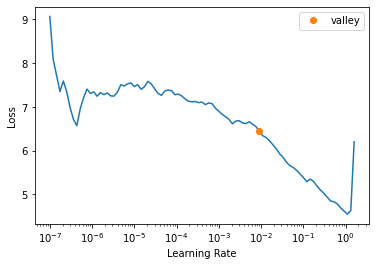

<Figure size 720x720 with 0 Axes>

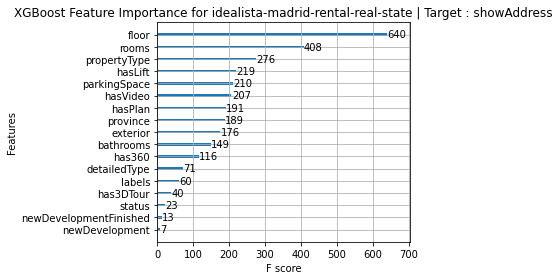

Target Variable: bathrooms
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exte

 17%|█▋        | 7/42 [00:00<00:01, 30.71it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.05824794586468873, 'Adjusted R-Squared': -0.26049890322726266, 'RMSE': 0.4887157750378918, 'Time taken': 0.0982966423034668}
{'Model': 'BaggingRegressor', 'R-Squared': 0.26654444444444436, 'Adjusted R-Squared': 0.018297948717948653, 'RMSE': 0.4312955436352154, 'Time taken': 0.03225088119506836}
{'Model': 'BayesianRidge', 'R-Squared': 0.33827223533804673, 'Adjusted R-Squared': 0.11430283806784725, 'RMSE': 0.4096639499453471, 'Time taken': 0.014340639114379883}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.0926680244399185, 'Adjusted R-Squared': -0.21442895190349365, 'RMSE': 0.47970161180012344, 'Time taken': 0.010845422744750977}
{'Model': 'DummyRegressor', 'R-Squared': -0.049318321247227015, 'Adjusted R-Squared': -0.4044722145924422, 'RMSE': 0.515871692543365, 'Time taken': 0.009368419647216797}
{'Model': 'ElasticNet', 'R-Squared': -0.049318321247227015, 'Adjusted R-Squared': -0.4044722145924422, 'RMSE': 0.515871692543365, 'Time taken':

 26%|██▌       | 11/42 [00:00<00:01, 23.90it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.30090058836840916, 'Adjusted R-Squared': 0.06428232597002459, 'RMSE': 0.4210731389958737, 'Time taken': 0.1468815803527832}
{'Model': 'GammaRegressor', 'R-Squared': 0.24975633724644275, 'Adjusted R-Squared': -0.004172287070145719, 'RMSE': 0.43620359186957136, 'Time taken': 0.012509346008300781}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6741307214891465, 'Adjusted R-Squared': -2.579221119531627, 'RMSE': 0.8235299274780796, 'Time taken': 0.03491067886352539}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2666895791378211, 'Adjusted R-Squared': 0.018492205922929883, 'RMSE': 0.4312528695816193, 'Time taken': 0.05854678153991699}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2724190277267393, 'Adjusted R-Squared': 0.02616085249578959, 'RMSE': 0.42956484888044943, 'Time taken': 0.1117396354675293}


 40%|████      | 17/42 [00:01<00:01, 13.62it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.37864911244930133, 'Adjusted R-Squared': 0.1683457351244495, 'RMSE': 0.3969689431584429, 'Time taken': 0.3291778564453125}
{'Model': 'HuberRegressor', 'R-Squared': -0.046875863049197886, 'Adjusted R-Squared': -0.40120307823508017, 'RMSE': 0.5152709553389231, 'Time taken': 0.06415128707885742}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.44439918533604894, 'Adjusted R-Squared': 0.25634967883440407, 'RMSE': 0.37537859676477414, 'Time taken': 0.016636133193969727}
{'Model': 'KernelRidge', 'R-Squared': -5.543019597818436, 'Adjusted R-Squared': -7.7575800770800605, 'RMSE': 1.2881818627960897, 'Time taken': 0.07152867317199707}


 52%|█████▏    | 22/42 [00:01<00:01, 16.25it/s]

{'Model': 'Lars', 'R-Squared': 0.33639660329270316, 'Adjusted R-Squared': 0.11179237671484887, 'RMSE': 0.4102441244230031, 'Time taken': 0.0891110897064209}
{'Model': 'LarsCV', 'R-Squared': 0.318170727458995, 'Adjusted R-Squared': 0.08739774290665492, 'RMSE': 0.41583964448626537, 'Time taken': 0.05205249786376953}
{'Model': 'Lasso', 'R-Squared': -0.049318321247227015, 'Adjusted R-Squared': -0.4044722145924422, 'RMSE': 0.515871692543365, 'Time taken': 0.01440286636352539}
{'Model': 'LassoCV', 'R-Squared': 0.3235878286307048, 'Adjusted R-Squared': 0.09464832447494342, 'RMSE': 0.4141844371863804, 'Time taken': 0.08108687400817871}
{'Model': 'LassoLars', 'R-Squared': -0.049318321247227015, 'Adjusted R-Squared': -0.4044722145924422, 'RMSE': 0.515871692543365, 'Time taken': 0.012892007827758789}
{'Model': 'LassoLarsCV', 'R-Squared': 0.318170727458995, 'Adjusted R-Squared': 0.08739774290665492, 'RMSE': 0.41583964448626537, 'Time taken': 0.042722463607788086}
{'Model': 'LassoLarsIC', 'R-Square

 69%|██████▉   | 29/42 [00:03<00:02,  5.32it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.2839835674231077, 'Adjusted R-Squared': 0.04163954408939041, 'RMSE': 0.4261373141778817, 'Time taken': 1.8881738185882568}
{'Model': 'NuSVR', 'R-Squared': 0.3301663164633989, 'Adjusted R-Squared': 0.10345337742024163, 'RMSE': 0.4121654281892869, 'Time taken': 0.1828160285949707}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.08544902208609406, 'Adjusted R-Squared': -0.22409130890015083, 'RMSE': 0.48160615518990363, 'Time taken': 0.011460304260253906}


 79%|███████▊  | 33/42 [00:03<00:01,  7.58it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.32274916303902523, 'Adjusted R-Squared': 0.09352580283684919, 'RMSE': 0.41444112581955206, 'Time taken': 0.021869897842407227}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5599744094379859, 'Adjusted R-Squared': -1.0879657480169964, 'RMSE': 0.62899444011804, 'Time taken': 0.012724637985229492}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2887823627125272, 'Adjusted R-Squared': 0.04806254701522883, 'RMSE': 0.42470691152412154, 'Time taken': 0.017405033111572266}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 98%|█████████▊| 41/42 [00:04<00:00, 12.89it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4539369863350975, 'Adjusted R-Squared': 0.2691156586331306, 'RMSE': 0.37214265384205697, 'Time taken': 0.18359708786010742}
{'Model': 'Ridge', 'R-Squared': 0.33673601085509586, 'Adjusted R-Squared': 0.11224666068297451, 'RMSE': 0.41013919897546175, 'Time taken': 0.011745691299438477}
{'Model': 'RidgeCV', 'R-Squared': 0.3388043977355668, 'Adjusted R-Squared': 0.11501511696914335, 'RMSE': 0.40949919065187873, 'Time taken': 0.012108802795410156}
{'Model': 'SGDRegressor', 'R-Squared': 0.349519987259893, 'Adjusted R-Squared': 0.12935752140939527, 'RMSE': 0.406167385913556, 'Time taken': 0.011356830596923828}
{'Model': 'SVR', 'R-Squared': 0.4052668677957303, 'Adjusted R-Squared': 0.2039725768958237, 'RMSE': 0.3883730952469846, 'Time taken': 0.019275903701782227}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3363966032927026, 'Adjusted R-Squared': 0.11179237671484821, 'RMSE': 0.4102441244230033, 'Time taken': 0.011356830596923828}
{'M

100%|██████████| 42/42 [00:04<00:00, 10.22it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.3761415569291928, 'Adjusted R-Squared': 0.16498946850522733, 'RMSE': 0.3977691507483573, 'Time taken': 0.0641791820526123}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: bathrooms
bathrooms
Target Standard Deviation: 0.41533109708006455
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.27       0.45  0.37        0.18
KNeighborsRegressor                          0.26       0.44  0.38        0.02
SVR                                          0.20       0.41  0.39        0.02
HistGradientBoostingRegressor                0.17       0.38  0.40        0.33
LGBMRegressor                                0.16       0.38  0.40        0.06
SGDRegressor                                 0.13       0.35  0.41        0.01
RidgeCV                                      0.12

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,52.271027,0.760969,0.872335,00:00
1,30.599998,2.823474,1.680320,00:00


Better model found at epoch 0 with _rmse value: 0.8723352551460266.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.96
1       1       1.06
2       1       1.03
3       1       1.01
4       1       1.00
XGBoost RMSE:  0.4340391


<Figure size 432x288 with 0 Axes>

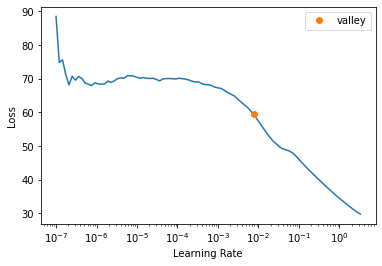

<Figure size 720x720 with 0 Axes>

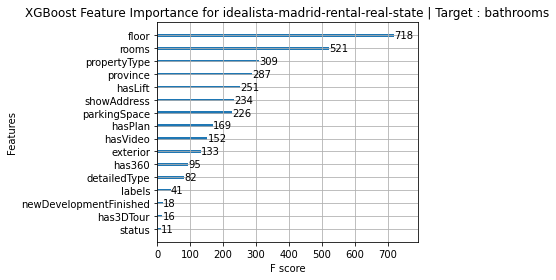

Target Variable: rooms
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior

 17%|█▋        | 7/42 [00:00<00:01, 31.73it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.614129204601774, 'Adjusted R-Squared': 0.48352678154391293, 'RMSE': 0.6100148923668528, 'Time taken': 0.05750083923339844}
{'Model': 'BaggingRegressor', 'R-Squared': 0.669532228687721, 'Adjusted R-Squared': 0.5576815983974113, 'RMSE': 0.5645261163793869, 'Time taken': 0.038162946701049805}
{'Model': 'BayesianRidge', 'R-Squared': 0.6196417274324457, 'Adjusted R-Squared': 0.4909050813326582, 'RMSE': 0.6056419033767717, 'Time taken': 0.012833118438720703}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5712050508473342, 'Adjusted R-Squared': 0.4260744526725858, 'RMSE': 0.6430493639988071, 'Time taken': 0.014409542083740234}
{'Model': 'DummyRegressor', 'R-Squared': -0.010589089378729488, 'Adjusted R-Squared': -0.35263462732229933, 'RMSE': 0.9872037242204442, 'Time taken': 0.011086702346801758}
{'Model': 'ElasticNet', 'R-Squared': 0.05650867635591661, 'Adjusted R-Squared': -0.2628268485697731, 'RMSE': 0.953868347846007, 'Time taken': 0.0122900

 26%|██▌       | 11/42 [00:00<00:01, 22.13it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.658174050430742, 'Adjusted R-Squared': 0.5424791136534546, 'RMSE': 0.5741455418499205, 'Time taken': 0.16568803787231445}
{'Model': 'GammaRegressor', 'R-Squared': 0.46439237296139557, 'Adjusted R-Squared': 0.28310979150217563, 'RMSE': 0.7186920798369701, 'Time taken': 0.014052629470825195}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.085042626391159, 'Adjusted R-Squared': -4.467672438400474, 'RMSE': 1.9848046960710282, 'Time taken': 0.04404926300048828}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.45836830465577816, 'Adjusted R-Squared': 0.27504680777004153, 'RMSE': 0.7227224039314498, 'Time taken': 0.05301713943481445}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.692786281273887, 'Adjusted R-Squared': 0.5888062533973564, 'RMSE': 0.5443018183446875, 'Time taken': 0.11630415916442871}


 40%|████      | 17/42 [00:01<00:01, 14.76it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6950923999002186, 'Adjusted R-Squared': 0.5918929044818311, 'RMSE': 0.5422550525706273, 'Time taken': 0.300248384475708}
{'Model': 'HuberRegressor', 'R-Squared': 0.5962349417643817, 'Adjusted R-Squared': 0.4595759989769418, 'RMSE': 0.6239989353725072, 'Time taken': 0.02230978012084961}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.595586502410284, 'Adjusted R-Squared': 0.4587080878414571, 'RMSE': 0.6244997998398398, 'Time taken': 0.015981435775756836}
{'Model': 'KernelRidge', 'R-Squared': -7.344052239117023, 'Adjusted R-Squared': -10.168192996972014, 'RMSE': 2.8366646047371074, 'Time taken': 0.06598925590515137}
{'Model': 'Lars', 'R-Squared': 0.6204199745207426, 'Adjusted R-Squared': 0.4919467351277632, 'RMSE': 0.605021987327466, 'Time taken': 0.06841564178466797}


 55%|█████▍    | 23/42 [00:01<00:01, 17.67it/s]

{'Model': 'LarsCV', 'R-Squared': 0.6222480789558151, 'Adjusted R-Squared': 0.49439358260239874, 'RMSE': 0.6035632984726357, 'Time taken': 0.06973671913146973}
{'Model': 'Lasso', 'R-Squared': -0.010589089378729488, 'Adjusted R-Squared': -0.35263462732229933, 'RMSE': 0.9872037242204442, 'Time taken': 0.012288808822631836}
{'Model': 'LassoCV', 'R-Squared': 0.622854218359209, 'Adjusted R-Squared': 0.4952048768807874, 'RMSE': 0.603078866292524, 'Time taken': 0.07408452033996582}
{'Model': 'LassoLars', 'R-Squared': -0.010589089378729488, 'Adjusted R-Squared': -0.35263462732229933, 'RMSE': 0.9872037242204442, 'Time taken': 0.011377334594726562}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6222480789558151, 'Adjusted R-Squared': 0.49439358260239874, 'RMSE': 0.6035632984726357, 'Time taken': 0.03934526443481445}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6239158236775015, 'Adjusted R-Squared': 0.4966257947683482, 'RMSE': 0.6022294826644935, 'Time taken': 0.017856836318969727}
{'Model': 'LinearRegressio

 71%|███████▏  | 30/42 [00:03<00:02,  5.78it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.586697219009922, 'Adjusted R-Squared': 0.44681012390558794, 'RMSE': 0.6313259577524624, 'Time taken': 1.9824504852294922}
{'Model': 'NuSVR', 'R-Squared': 0.6064653697459721, 'Adjusted R-Squared': 0.4732690333523012, 'RMSE': 0.6160429050728816, 'Time taken': 0.0552372932434082}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5365971717920303, 'Adjusted R-Squared': 0.3797531376293328, 'RMSE': 0.6684960146658403, 'Time taken': 0.025405406951904297}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6150530489082624, 'Adjusted R-Squared': 0.4847633116156743, 'RMSE': 0.6092842119011804, 'Time taken': 0.03473711013793945}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.6800491014652859, 'Adjusted R-Squared': -1.2486811050381519, 'RMSE': 1.2728595045828366, 'Time taken': 0.014724969863891602}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5393865395094253, 'Adjusted R-Squared': 0.3834865990356924, 'RMSE': 0.6664810337551413, 'Time take

 79%|███████▊  | 33/42 [00:03<00:01,  7.44it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.5659327188845702, 'Adjusted R-Squared': 0.41901763912242473, 'RMSE': 0.6469906552466596, 'Time taken': 0.08801865577697754}


 98%|█████████▊| 41/42 [00:03<00:00, 12.31it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7045826104720364, 'Adjusted R-Squared': 0.6045951863241104, 'RMSE': 0.5337495360908759, 'Time taken': 0.20990824699401855}
{'Model': 'Ridge', 'R-Squared': 0.6206218805045667, 'Adjusted R-Squared': 0.49221697852149693, 'RMSE': 0.6048610544540246, 'Time taken': 0.014053821563720703}
{'Model': 'RidgeCV', 'R-Squared': 0.6207628037609185, 'Adjusted R-Squared': 0.4924055988799987, 'RMSE': 0.6047487036063974, 'Time taken': 0.013837099075317383}
{'Model': 'SGDRegressor', 'R-Squared': 0.6304320651855462, 'Adjusted R-Squared': 0.5053475334021926, 'RMSE': 0.5969894055683397, 'Time taken': 0.014656305313110352}
{'Model': 'SVR', 'R-Squared': 0.5928245700437684, 'Adjusted R-Squared': 0.455011347597044, 'RMSE': 0.6266286745173889, 'Time taken': 0.02367997169494629}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6204199745207417, 'Adjusted R-Squared': 0.491946735127762, 'RMSE': 0.6050219873274667, 'Time taken': 0.011581182479858398}
{'Model': '

100%|██████████| 42/42 [00:04<00:00, 10.34it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6906072587112458, 'Adjusted R-Squared': 0.5858897155058214, 'RMSE': 0.5462287346628102, 'Time taken': 0.06908941268920898}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: rooms
rooms
Target Standard Deviation: 0.9599076224080563
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.60       0.70  0.53        0.21
HistGradientBoostingRegressor                0.59       0.70  0.54        0.30
GradientBoostingRegressor                    0.59       0.69  0.54        0.12
LGBMRegressor                                0.59       0.69  0.55        0.07
BaggingRegressor                             0.56       0.67  0.56        0.04
ExtraTreesRegressor                          0.54       0.66  0.57        0.17
XGBRegressor                                 0.52       0.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,17.827505,3.942059,1.985462,00:00
1,12.712493,0.929467,0.964089,00:00
2,10.480963,1.442969,1.201236,00:00


Better model found at epoch 0 with _rmse value: 1.9854618310928345.
Better model found at epoch 1 with _rmse value: 0.9640887975692749.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       3.40
1       5       4.65
2       1       1.38
3       3       2.94
4       2       1.91
XGBoost RMSE:  0.5863601


<Figure size 432x288 with 0 Axes>

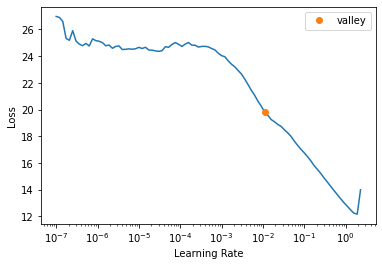

<Figure size 720x720 with 0 Axes>

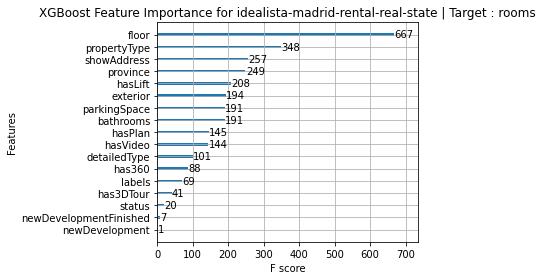

Target Variable: exterior
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
32
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exter

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0765848739998718, 'Adjusted R-Squared': -0.4409674467382898, 'RMSE': 0.3901651941789408, 'Time taken': 0.02875208854675293}
{'Model': 'BaggingRegressor', 'R-Squared': -0.3023192872919964, 'Adjusted R-Squared': -0.7431042768369798, 'RMSE': 0.4291243154947706, 'Time taken': 0.03375077247619629}


 12%|█▏        | 5/42 [00:00<00:00, 49.60it/s]

{'Model': 'BayesianRidge', 'R-Squared': -0.04533150980242784, 'Adjusted R-Squared': -0.39913602081248034, 'RMSE': 0.38446021836918143, 'Time taken': 0.015347003936767578}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.0309094109485497, 'Adjusted R-Squared': -1.7182941346542124, 'RMSE': 0.5358826094386181, 'Time taken': 0.012453317642211914}
{'Model': 'DummyRegressor', 'R-Squared': -0.0033105423644277376, 'Adjusted R-Squared': -0.34289257208777246, 'RMSE': 0.3766535588505218, 'Time taken': 0.010012626647949219}
{'Model': 'ElasticNet', 'R-Squared': -0.0033105423644277376, 'Adjusted R-Squared': -0.34289257208777246, 'RMSE': 0.3766535588505218, 'Time taken': 0.0142669677734375}
{'Model': 'ElasticNetCV', 'R-Squared': -0.053123745725648375, 'Adjusted R-Squared': -0.40956562889432924, 'RMSE': 0.38589050267926517, 'Time taken': 0.07134532928466797}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.8099048447385042, 'Adjusted R-Squared': -1.42248802295769, 'RMSE': 0.5058855316163356, 'Time ta

 24%|██▍       | 10/42 [00:00<00:01, 24.49it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.5584358036426138, 'Adjusted R-Squared': -1.0859063833370368, 'RMSE': 0.4694278439166099, 'Time taken': 0.16100645065307617}
{'Model': 'GammaRegressor', 'R-Squared': -0.009826830601274317, 'Adjusted R-Squared': -0.35161437326632083, 'RMSE': 0.3778747215746418, 'Time taken': 0.01592540740966797}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.181249110629628, 'Adjusted R-Squared': -8.611825732688887, 'RMSE': 1.0076840479604083, 'Time taken': 0.04536008834838867}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.005011949973605878, 'Adjusted R-Squared': -0.3451698407339032, 'RMSE': 0.37697278692124553, 'Time taken': 0.05581808090209961}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.14767975463312988, 'Adjusted R-Squared': -0.5361252100474199, 'RMSE': 0.40284200399313913, 'Time taken': 0.11525177955627441}


 40%|████      | 17/42 [00:01<00:01, 14.68it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.3341112350093687, 'Adjusted R-Squared': -0.7856565760894625, 'RMSE': 0.4343305803043433, 'Time taken': 0.296306848526001}
{'Model': 'HuberRegressor', 'R-Squared': -0.2388798368130547, 'Adjusted R-Squared': -0.6581930123497808, 'RMSE': 0.418541936917267, 'Time taken': 0.062314748764038086}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.08332420091324177, 'Adjusted R-Squared': -0.4499877766069542, 'RMSE': 0.3913844889387138, 'Time taken': 0.016801834106445312}
{'Model': 'KernelRidge', 'R-Squared': -23.119644941809014, 'Adjusted R-Squared': -31.283217075959755, 'RMSE': 1.8467573775063362, 'Time taken': 0.06755256652832031}


 48%|████▊     | 20/42 [00:01<00:01, 15.67it/s]

{'Model': 'Lars', 'R-Squared': -0.1298336566709446, 'Adjusted R-Squared': -0.512238894313418, 'RMSE': 0.39969769278364076, 'Time taken': 0.06442070007324219}
{'Model': 'LarsCV', 'R-Squared': -0.048397251377874984, 'Adjusted R-Squared': -0.4032393979980786, 'RMSE': 0.385023576854495, 'Time taken': 0.07161116600036621}
{'Model': 'Lasso', 'R-Squared': -0.0033105423644277376, 'Adjusted R-Squared': -0.34289257208777246, 'RMSE': 0.3766535588505218, 'Time taken': 0.012772560119628906}
{'Model': 'LassoCV', 'R-Squared': -0.05549410320414827, 'Adjusted R-Squared': -0.4127382612117061, 'RMSE': 0.38632453729445215, 'Time taken': 0.08267068862915039}
{'Model': 'LassoLars', 'R-Squared': -0.0033105423644277376, 'Adjusted R-Squared': -0.34289257208777246, 'RMSE': 0.3766535588505218, 'Time taken': 0.013590812683105469}


 55%|█████▍    | 23/42 [00:01<00:01, 17.04it/s]

{'Model': 'LassoLarsCV', 'R-Squared': -0.048397251377874984, 'Adjusted R-Squared': -0.4032393979980786, 'RMSE': 0.385023576854495, 'Time taken': 0.04164695739746094}
{'Model': 'LassoLarsIC', 'R-Squared': -0.01843956367443389, 'Adjusted R-Squared': -0.36314218522578057, 'RMSE': 0.37948273199470817, 'Time taken': 0.0176241397857666}
{'Model': 'LinearRegression', 'R-Squared': -0.1298336566709446, 'Adjusted R-Squared': -0.512238894313418, 'RMSE': 0.39969769278364076, 'Time taken': 0.012758731842041016}
{'Model': 'LinearSVR', 'R-Squared': -0.23936912085613193, 'Adjusted R-Squared': -0.6588479002228227, 'RMSE': 0.41862457837668454, 'Time taken': 0.050533294677734375}


 69%|██████▉   | 29/42 [00:03<00:02,  5.07it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.4244055138400895, 'Adjusted R-Squared': -0.9065119954475043, 'RMSE': 0.448787973722925, 'Time taken': 2.010688066482544}
{'Model': 'NuSVR', 'R-Squared': -0.23656993079863797, 'Adjusted R-Squared': -0.6551012919920229, 'RMSE': 0.41815156668996506, 'Time taken': 0.13912582397460938}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.03052433457190351, 'Adjusted R-Squared': -0.379317186273163, 'RMSE': 0.38172755728427077, 'Time taken': 0.016307353973388672}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.054264342553617784, 'Adjusted R-Squared': -0.41109227387945757, 'RMSE': 0.38609941752594024, 'Time taken': 0.01900482177734375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -2.115038168039317, 'Adjusted R-Squared': -3.1693587787603166, 'RMSE': 0.663675940017289, 'Time taken': 0.01210165023803711}


 79%|███████▊  | 33/42 [00:03<00:01,  7.38it/s]

{'Model': 'PoissonRegressor', 'R-Squared': -0.02075890950538417, 'Adjusted R-Squared': -0.3662465404148987, 'RMSE': 0.37991459422278084, 'Time taken': 0.014053583145141602}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 98%|█████████▊| 41/42 [00:04<00:00, 12.71it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.27615257606288224, 'Adjusted R-Squared': -0.7080811402687808, 'RMSE': 0.42479137301433506, 'Time taken': 0.18704962730407715}
{'Model': 'Ridge', 'R-Squared': -0.12809708911461826, 'Adjusted R-Squared': -0.5099145654303352, 'RMSE': 0.3993904046454998, 'Time taken': 0.012059211730957031}
{'Model': 'RidgeCV', 'R-Squared': -0.11393725700106927, 'Adjusted R-Squared': -0.49096217475527726, 'RMSE': 0.3968759226605028, 'Time taken': 0.013796806335449219}
{'Model': 'SGDRegressor', 'R-Squared': -0.10144979923052078, 'Adjusted R-Squared': -0.4742481928162354, 'RMSE': 0.3946451241798422, 'Time taken': 0.011444330215454102}
{'Model': 'SVR', 'R-Squared': -0.2883806964747737, 'Adjusted R-Squared': -0.7244480091277739, 'RMSE': 0.42682170081566173, 'Time taken': 0.021183013916015625}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.1298336566709446, 'Adjusted R-Squared': -0.512238894313418, 'RMSE': 0.39969769278364076, 'Time taken': 0.0110640525

100%|██████████| 42/42 [00:04<00:00, 10.16it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.3591517757051137, 'Adjusted R-Squared': -0.8191723767129981, 'RMSE': 0.43838770542548355, 'Time taken': 0.06946372985839844}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: exterior
exterior
Target Standard Deviation: 0.39394374654825576
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DummyRegressor                              -0.34      -0.00  0.38        0.01
ElasticNet                                  -0.34      -0.00  0.38        0.01
LassoLars                                   -0.34      -0.00  0.38        0.01
Lasso                                       -0.34      -0.00  0.38        0.01
TweedieRegressor                            -0.35      -0.01  0.38        0.01
GeneralizedLinearRegressor                  -0.35      -0.01  0.38        0.06
GammaRegressor                              -0.3

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.290833,2.222194,1.490703,00:00
1,4.910855,0.593025,0.770081,00:00
2,4.529739,0.465712,0.682431,00:00
3,3.767670,0.642964,0.801850,00:00


Better model found at epoch 0 with _rmse value: 1.4907026290893555.
Better model found at epoch 1 with _rmse value: 0.7700812816619873.
Better model found at epoch 2 with _rmse value: 0.6824310421943665.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.98
1       2       1.67
2       2       1.73
3       2       1.99
4       2       1.86
XGBoost RMSE:  0.46231958


<Figure size 432x288 with 0 Axes>

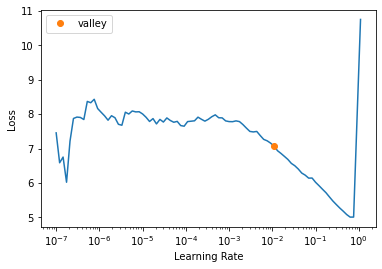

<Figure size 720x720 with 0 Axes>

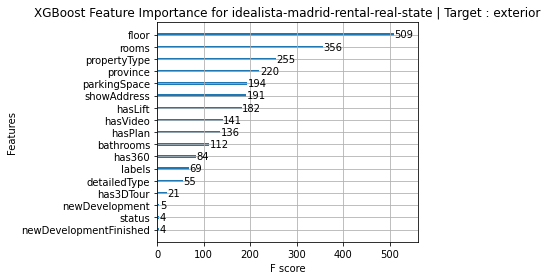

Target Variable: size
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'price', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
31
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'price', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bath

 17%|█▋        | 7/42 [00:00<00:01, 29.74it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.29424686274752987, 'Adjusted R-Squared': 0.040616829047423364, 'RMSE': 50.335044034247545, 'Time taken': 0.10146498680114746}
{'Model': 'BaggingRegressor', 'R-Squared': 0.29340264380628045, 'Adjusted R-Squared': 0.03946921892416244, 'RMSE': 50.365140320901624, 'Time taken': 0.037603139877319336}
{'Model': 'BayesianRidge', 'R-Squared': 0.3778609473757304, 'Adjusted R-Squared': 0.15427972533888346, 'RMSE': 47.2593534668579, 'Time taken': 0.011477470397949219}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.38103551682460735, 'Adjusted R-Squared': 0.15859515568345062, 'RMSE': 47.138624849333425, 'Time taken': 0.011685609817504883}
{'Model': 'DummyRegressor', 'R-Squared': -0.041569507433038, 'Adjusted R-Squared': -0.41588354916678605, 'RMSE': 61.148834, 'Time taken': 0.009876251220703125}
{'Model': 'ElasticNet', 'R-Squared': 0.34183207832497786, 'Adjusted R-Squared': 0.10530298147301675, 'RMSE': 48.60852019747382, 'Time taken': 0.010732412338

 31%|███       | 13/42 [00:00<00:01, 19.29it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.4279234691530093, 'Adjusted R-Squared': 0.22233346587987202, 'RMSE': 45.31803911192979, 'Time taken': 0.1900312900543213}
{'Model': 'GammaRegressor', 'R-Squared': 0.2806504378247059, 'Adjusted R-Squared': 0.022134188917959596, 'RMSE': 50.81758660713538, 'Time taken': 0.013355016708374023}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.8212017872373274, 'Adjusted R-Squared': -1.475696179525742, 'RMSE': 80.85801547727002, 'Time taken': 0.03285098075866699}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3197000265114719, 'Adjusted R-Squared': 0.07521722353903215, 'RMSE': 49.41903619265799, 'Time taken': 0.0252535343170166}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.39353714042902743, 'Adjusted R-Squared': 0.17558955027070922, 'RMSE': 46.66015196306453, 'Time taken': 0.11209559440612793}


 43%|████▎     | 18/42 [00:01<00:01, 15.59it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.36490469238239065, 'Adjusted R-Squared': 0.13666731620731232, 'RMSE': 47.74891375057046, 'Time taken': 0.27785825729370117}
{'Model': 'HuberRegressor', 'R-Squared': 0.3542828380596066, 'Adjusted R-Squared': 0.1222282329872777, 'RMSE': 48.14655400894954, 'Time taken': 0.02118825912475586}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4134148508990848, 'Adjusted R-Squared': 0.2026108129409434, 'RMSE': 45.8891, 'Time taken': 0.015006065368652344}
{'Model': 'KernelRidge', 'R-Squared': -1.1290001914314276, 'Adjusted R-Squared': -1.894109635227097, 'RMSE': 87.42424581058668, 'Time taken': 0.05133414268493652}
{'Model': 'Lars', 'R-Squared': 0.3758777909211868, 'Adjusted R-Squared': 0.15158387203348833, 'RMSE': 47.334616482160676, 'Time taken': 0.054193973541259766}


 50%|█████     | 21/42 [00:01<00:01, 16.00it/s]

{'Model': 'LarsCV', 'R-Squared': 0.3484454181998582, 'Adjusted R-Squared': 0.11429299036543228, 'RMSE': 48.36369189104781, 'Time taken': 0.07753634452819824}
{'Model': 'Lasso', 'R-Squared': 0.3378087218255237, 'Adjusted R-Squared': 0.09983373123157124, 'RMSE': 48.756864891974246, 'Time taken': 0.012163162231445312}
{'Model': 'LassoCV', 'R-Squared': 0.35145139123306546, 'Adjusted R-Squared': 0.1183792349574484, 'RMSE': 48.25199900710147, 'Time taken': 0.0785977840423584}
{'Model': 'LassoLars', 'R-Squared': -0.04156941119432611, 'Adjusted R-Squared': -0.41588341834228704, 'RMSE': 61.14883012714598, 'Time taken': 0.012645721435546875}
{'Model': 'LassoLarsCV', 'R-Squared': 0.3484454181998582, 'Adjusted R-Squared': 0.11429299036543228, 'RMSE': 48.36369189104781, 'Time taken': 0.03924059867858887}
{'Model': 'LassoLarsIC', 'R-Squared': 0.3297967812865199, 'Adjusted R-Squared': 0.08894249956136302, 'RMSE': 49.05093596867798, 'Time taken': 0.017197370529174805}
{'Model': 'LinearRegression', 'R-

 71%|███████▏  | 30/42 [00:03<00:02,  5.83it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.3473416410189577, 'Adjusted R-Squared': 0.11279254326014565, 'RMSE': 48.404640225713976, 'Time taken': 2.1813852787017822}
{'Model': 'NuSVR', 'R-Squared': 0.03436460837388455, 'Adjusted R-Squared': -0.31266061049175065, 'RMSE': 58.877672235594225, 'Time taken': 0.051100730895996094}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2567715313983102, 'Adjusted R-Squared': -0.010326199505422018, 'RMSE': 51.65414917716218, 'Time taken': 0.027712345123291016}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3715281285382387, 'Adjusted R-Squared': 0.14567104973166822, 'RMSE': 47.49927343429091, 'Time taken': 0.03671145439147949}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.36833498009828614, 'Adjusted R-Squared': 0.14133036357110773, 'RMSE': 47.61978802772991, 'Time taken': 0.015309572219848633}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3249703321268461, 'Adjusted R-Squared': 0.08238154523493146, 'RMSE': 49.227238579237174, 'T

 79%|███████▊  | 33/42 [00:03<00:01,  7.29it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.06112367679175079, 'Adjusted R-Squared': -0.27628500186121374, 'RMSE': 58.056150743170264, 'Time taken': 0.09776496887207031}


 98%|█████████▊| 41/42 [00:04<00:00, 11.86it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.3518806216278495, 'Adjusted R-Squared': 0.1189627200253579, 'RMSE': 48.23602899939768, 'Time taken': 0.2377018928527832}
{'Model': 'Ridge', 'R-Squared': 0.3761026613150794, 'Adjusted R-Squared': 0.1518895552251861, 'RMSE': 47.32608841454859, 'Time taken': 0.012696266174316406}
{'Model': 'RidgeCV', 'R-Squared': 0.37761829189055474, 'Adjusted R-Squared': 0.1539498655387228, 'RMSE': 47.2685689495635, 'Time taken': 0.014953374862670898}
{'Model': 'SGDRegressor', 'R-Squared': 0.36864958475875087, 'Adjusted R-Squared': 0.141758029281427, 'RMSE': 47.60792788617382, 'Time taken': 0.01335000991821289}
{'Model': 'SVR', 'R-Squared': 0.032216743106193824, 'Adjusted R-Squared': -0.3155803648400177, 'RMSE': 58.943116742072235, 'Time taken': 0.022660017013549805}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.37587779092118734, 'Adjusted R-Squared': 0.151583872033489, 'RMSE': 47.334616482160655, 'Time taken': 0.012205839157104492}
{'Model': 'T

100%|██████████| 42/42 [00:04<00:00,  9.85it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.36471350468454733, 'Adjusted R-Squared': 0.13640742043055654, 'RMSE': 47.75610032386465, 'Time taken': 0.07165813446044922}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: size
size
Target Standard Deviation: 26.087141036987305
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.22       0.43 45.32        0.19
KNeighborsRegressor                          0.20       0.41 45.89        0.02
GradientBoostingRegressor                    0.18       0.39 46.66        0.11
DecisionTreeRegressor                        0.16       0.38 47.14        0.01
BayesianRidge                                0.15       0.38 47.26        0.01
RidgeCV                                      0.15       0.38 47.27        0.01
Ridge                                        0.15       0.3

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4730.717285,9425.699219,97.086037,00:00
1,4323.958496,8629.532227,92.895279,00:00
2,3549.910645,5698.391113,75.487694,00:00
3,2796.364990,4074.328857,63.830471,00:00
4,2277.332275,5491.934082,74.107582,00:00


Better model found at epoch 0 with _rmse value: 97.0860366821289.
Better model found at epoch 1 with _rmse value: 92.89527893066406.
Better model found at epoch 2 with _rmse value: 75.4876937866211.
Better model found at epoch 3 with _rmse value: 63.83047103881836.
No improvement since epoch 3: early stopping


,propertyType,operation,exterior,rooms,bathrooms,province,country,showAddress,hasVideo,status,newDevelopment,detailedType,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,floor,hasLift,parkingSpace,labels,newDevelopmentFinished,size,size_pred
0,1.00,1.00,1.00,0.00,3.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,371.00,54.55
1,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,1.00,6.00,1.00,1.00,45.00,53.54
2,4.00,1.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,6.00,1.00,1.00,125.00,56.47
3,4.00,1.00,2.00,3.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,2.00,6.00,1.00,1.00,85.00,51.03
4,4.00,1.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,90.00,51.78
5,5.00,1.00,2.00,3.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,8.00,1.00,1.00,2.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,1.00,67.00,56.38
6,4.00,1.00,2.00,3.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,6.00,1.00,1.00,87.00,51.11
7,4.00,1.00,1.00,4.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,1.00,44.00,61.98
8,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,6.00,1.00,1.00,1.00,1.00,59.00,55.55


<Figure size 432x288 with 0 Axes>

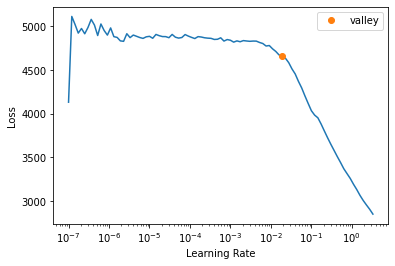

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   51.00      51.70
1   33.00      44.13
2   59.00      53.70
3   35.00      39.19
4   80.00      55.26
XGBoost RMSE:  49.1647


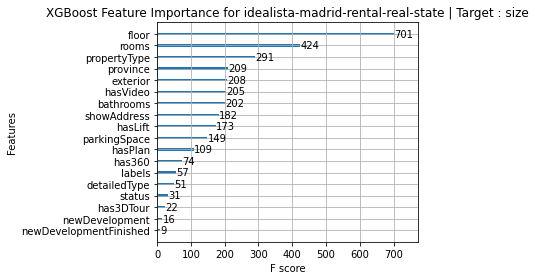

Target Variable: price
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'numPhotos', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
31
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['numPhotos', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathr

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.334986760872381, 'Adjusted R-Squared': 0.09599762806089296, 'RMSE': 64.74349270713317, 'Time taken': 0.0331873893737793}


 19%|█▉        | 8/42 [00:00<00:00, 37.28it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.4064215949077291, 'Adjusted R-Squared': 0.19310435557769423, 'RMSE': 61.167400629848004, 'Time taken': 0.041496992111206055}
{'Model': 'BayesianRidge', 'R-Squared': 0.22537475734914536, 'Adjusted R-Squared': -0.05300618922850542, 'RMSE': 69.875801340054, 'Time taken': 0.015051603317260742}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.045809953483585186, 'Adjusted R-Squared': -0.2971020944832514, 'RMSE': 77.5529673998697, 'Time taken': 0.0127716064453125}
{'Model': 'DummyRegressor', 'R-Squared': -0.008842746174569038, 'Adjusted R-Squared': -0.37139560808105476, 'RMSE': 79.74303, 'Time taken': 0.013312816619873047}
{'Model': 'ElasticNet', 'R-Squared': 0.21878295469102993, 'Adjusted R-Squared': -0.06196692096688117, 'RMSE': 70.1724814060549, 'Time taken': 0.011665821075439453}
{'Model': 'ElasticNetCV', 'R-Squared': 0.2304695107449095, 'Adjusted R-Squared': -0.04608050883113868, 'RMSE': 69.6456337394118, 'Time taken': 0.07156801223754883}
{

 29%|██▊       | 12/42 [00:00<00:01, 20.06it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.29706886676321476, 'Adjusted R-Squared': 0.04445299075624509, 'RMSE': 66.56368677414615, 'Time taken': 0.19048714637756348}
{'Model': 'GammaRegressor', 'R-Squared': 0.19377125455978195, 'Adjusted R-Squared': -0.0959672008327963, 'RMSE': 71.28696382120383, 'Time taken': 0.015216588973999023}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -17.879127089227214, 'Adjusted R-Squared': -24.663813386918246, 'RMSE': 344.96253754613264, 'Time taken': 0.052942752838134766}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.19159639271682904, 'Adjusted R-Squared': -0.09892365365056044, 'RMSE': 71.38305000126016, 'Time taken': 0.04849720001220703}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.4971090356456074, 'Adjusted R-Squared': 0.31638259533074753, 'RMSE': 56.30123158493255, 'Time taken': 0.10513043403625488}


 45%|████▌     | 19/42 [00:01<00:01, 16.52it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.4374210592701693, 'Adjusted R-Squared': 0.23524425244538638, 'RMSE': 59.54875888314485, 'Time taken': 0.2807276248931885}
{'Model': 'HuberRegressor', 'R-Squared': 0.19389304045475397, 'Adjusted R-Squared': -0.0958016481318189, 'RMSE': 71.28157944696717, 'Time taken': 0.02431464195251465}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.3181469136875943, 'Adjusted R-Squared': 0.0731059607940735, 'RMSE': 65.558105, 'Time taken': 0.01584005355834961}
{'Model': 'KernelRidge', 'R-Squared': -72.8470620752601, 'Adjusted R-Squared': -99.3858500085567, 'RMSE': 682.2563553046926, 'Time taken': 0.020179271697998047}
{'Model': 'Lars', 'R-Squared': 0.1694222205195386, 'Adjusted R-Squared': -0.1290666689812523, 'RMSE': 72.3554306858435, 'Time taken': 0.02162313461303711}
{'Model': 'LarsCV', 'R-Squared': 0.2198903955771564, 'Adjusted R-Squared': -0.06046149351230312, 'RMSE': 70.12272606867778, 'Time taken': 0.06532025337219238}
{'Model': 'Lasso

 52%|█████▏    | 22/42 [00:01<00:01, 18.25it/s]

{'Model': 'LassoCV', 'R-Squared': 0.22139415501102078, 'Adjusted R-Squared': -0.058417320531893635, 'RMSE': 70.05510827803323, 'Time taken': 0.07992863655090332}
{'Model': 'LassoLars', 'R-Squared': 0.18082607355418234, 'Adjusted R-Squared': -0.11356455626228334, 'RMSE': 71.85699297393704, 'Time taken': 0.012044429779052734}
{'Model': 'LassoLarsCV', 'R-Squared': 0.2198903955771564, 'Adjusted R-Squared': -0.06046149351230312, 'RMSE': 70.12272606867778, 'Time taken': 0.03593254089355469}
{'Model': 'LassoLarsIC', 'R-Squared': 0.22238571061813572, 'Adjusted R-Squared': -0.057069424628471754, 'RMSE': 70.01048642896967, 'Time taken': 0.016805648803710938}
{'Model': 'LinearRegression', 'R-Squared': 0.18317223983951758, 'Adjusted R-Squared': -0.11037523646815584, 'RMSE': 71.75401768747776, 'Time taken': 0.012146472930908203}
{'Model': 'LinearSVR', 'R-Squared': -16.776334360642625, 'Adjusted R-Squared': -23.164704521498567, 'RMSE': 334.73573943529374, 'Time taken': 0.012364864349365234}


 69%|██████▉   | 29/42 [00:03<00:02,  4.75it/s]

{'Model': 'MLPRegressor', 'R-Squared': -57.69507944661514, 'Adjusted R-Squared': -78.78862362274245, 'RMSE': 608.2495919281596, 'Time taken': 2.5293266773223877}
{'Model': 'NuSVR', 'R-Squared': 0.02852999904386644, 'Adjusted R-Squared': -0.320592032549744, 'RMSE': 78.25204137652736, 'Time taken': 0.08642864227294922}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.21696646840381528, 'Adjusted R-Squared': -0.06443620701356356, 'RMSE': 70.25401658261774, 'Time taken': 0.021310806274414062}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.22848895731942798, 'Adjusted R-Squared': -0.048772823643902674, 'RMSE': 69.73520021000856, 'Time taken': 0.021587848663330078}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.02713504717542259, 'Adjusted R-Squared': -0.32248829524590983, 'RMSE': 78.30820300472375, 'Time taken': 0.012334346771240234}
{'Model': 'PoissonRegressor', 'R-Squared': 0.18430896499565508, 'Adjusted R-Squared': -0.10883000070903148, 'RMSE': 71.70407264538034, 'T

 79%|███████▊  | 33/42 [00:04<00:01,  6.72it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.07969294097818347, 'Adjusted R-Squared': -0.4677075916422182, 'RMSE': 82.49566159493136, 'Time taken': 0.08898210525512695}


 98%|█████████▊| 41/42 [00:04<00:00, 11.13it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4436966603808138, 'Adjusted R-Squared': 0.24377514770516873, 'RMSE': 59.21569248385183, 'Time taken': 0.22025108337402344}
{'Model': 'Ridge', 'R-Squared': 0.18504274914698582, 'Adjusted R-Squared': -0.10783251287831619, 'RMSE': 71.67181340250639, 'Time taken': 0.012545108795166016}
{'Model': 'RidgeCV', 'R-Squared': 0.1989188822034873, 'Adjusted R-Squared': -0.0889696445046344, 'RMSE': 71.05902208212416, 'Time taken': 0.012154579162597656}
{'Model': 'SGDRegressor', 'R-Squared': 0.1850160023222429, 'Adjusted R-Squared': -0.10786887184320104, 'RMSE': 71.6729895241382, 'Time taken': 0.013875484466552734}
{'Model': 'SVR', 'R-Squared': -0.021791147470883176, 'Adjusted R-Squared': -0.3889973410932319, 'RMSE': 80.25314240487079, 'Time taken': 0.02240133285522461}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.18317223983951758, 'Adjusted R-Squared': -0.11037523646815584, 'RMSE': 71.75401768747776, 'Time taken': 0.011058330535888672}
{'M

100%|██████████| 42/42 [00:04<00:00,  9.32it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.42846252057010725, 'Adjusted R-Squared': 0.22306623889998956, 'RMSE': 60.02101514305289, 'Time taken': 0.06896686553955078}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: price
price
Target Standard Deviation: 84.88044738769531
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.32       0.50  56.30   
RandomForestRegressor                        0.24       0.44  59.22   
HistGradientBoostingRegressor                0.24       0.44  59.55   
LGBMRegressor                                0.22       0.43  60.02   
BaggingRegressor                             0.19       0.41  61.17   
XGBRegressor                                 0.17       0.39  62.06   
AdaBoostRegressor                            0.10       0.33  64.74   
KNeighborsRegressor                          0.07  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,458352.156250,465377.312500,682.185669,00:00
1,453288.343750,456825.906250,675.888977,00:00
2,441968.906250,413896.093750,643.347595,00:00
3,413679.250000,228834.234375,478.366211,00:00
4,349613.718750,10040.409180,100.201836,00:00
5,280811.218750,116396.429688,341.169220,00:00


Better model found at epoch 0 with _rmse value: 682.1856689453125.
Better model found at epoch 1 with _rmse value: 675.8889770507812.
Better model found at epoch 2 with _rmse value: 643.3475952148438.
Better model found at epoch 3 with _rmse value: 478.3662109375.
Better model found at epoch 4 with _rmse value: 100.20183563232422.
No improvement since epoch 4: early stopping


,propertyType,operation,exterior,rooms,bathrooms,province,country,showAddress,hasVideo,status,newDevelopment,detailedType,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,floor,hasLift,parkingSpace,labels,newDevelopmentFinished,price,price_pred
0,4.00,1.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,10.00,2.00,1.00,1.00,1.00,1.00,1.00,9.00,2.00,1.00,1.00,1.00,750.00,754.13
1,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,740.00,750.56
2,4.00,1.00,2.00,4.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,4.00,2.00,1.00,1.00,1.00,750.00,704.72
3,4.00,1.00,2.00,4.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,730.00,748.74
4,6.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,9.00,2.00,2.00,1.00,1.00,1.00,1.00,4.00,2.00,1.00,1.00,1.00,750.00,725.22
5,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,6.00,1.00,1.00,750.00,716.24
6,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,650.00,750.12
7,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,730.00,750.56
8,4.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,1.00,2.00,1.00,700.00,704.63


<Figure size 432x288 with 0 Axes>

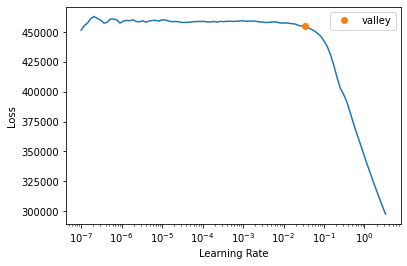

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  550.00     626.26
1  750.00     698.42
2  750.00     723.95
3  700.00     704.05
4  475.00     528.45
XGBoost RMSE:  62.056667


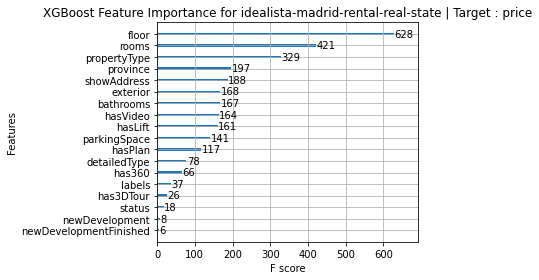

Target Variable: numPhotos
CATS=====================
['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms', 'province', 'country', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'detailedType', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace', 'labels', 'newDevelopmentFinished']
CONTS=====================
['thumbnail', 'price', 'size', 'municipality', 'distance', 'priceByArea', 'district', 'neighborhood']
31
Could not convert thumbnail to float.
Could not convert municipality to float.
Could not convert district to float.
Could not convert neighborhood to float.
Looping through continuous variables to find breakpoint
Error with  thumbnail
Error with  municipality
Error with  district
Error with  neighborhood
Continuous variables that made the cut : ['price', 'size', 'distance', 'priceByArea']
Categorical variables that made the cut : ['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.10851280828897214, 'Adjusted R-Squared': -0.21186540123217856, 'RMSE': 9.807668386156703, 'Time taken': 0.04958653450012207}


 17%|█▋        | 7/42 [00:00<00:01, 33.23it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.07686026284897918, 'Adjusted R-Squared': -0.46385691981033106, 'RMSE': 10.779233877485014, 'Time taken': 0.03858447074890137}
{'Model': 'BayesianRidge', 'R-Squared': 0.1787010606412004, 'Adjusted R-Squared': -0.11645324569086823, 'RMSE': 9.41366740663102, 'Time taken': 0.012483835220336914}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.2800401598548061, 'Adjusted R-Squared': -0.7400545923026272, 'RMSE': 11.75222281790199, 'Time taken': 0.013315916061401367}
{'Model': 'DummyRegressor', 'R-Squared': -0.01358800353405698, 'Adjusted R-Squared': -0.37784619230410876, 'RMSE': 10.457767, 'Time taken': 0.010158538818359375}
{'Model': 'ElasticNet', 'R-Squared': 0.16466186593069365, 'Adjusted R-Squared': -0.13553777600046324, 'RMSE': 9.493784582045201, 'Time taken': 0.011429071426391602}
{'Model': 'ElasticNetCV', 'R-Squared': 0.1826317145943167, 'Adjusted R-Squared': -0.11111001297335066, 'RMSE': 9.391113957885386, 'Time taken': 0.07641363143920

 26%|██▌       | 11/42 [00:00<00:01, 21.07it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.147716682398924, 'Adjusted R-Squared': -0.5601773651360373, 'RMSE': 11.12821650244335, 'Time taken': 0.19349050521850586}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6734494523125374, 'Adjusted R-Squared': -2.6342203492373555, 'RMSE': 16.984165293736776, 'Time taken': 0.047180891036987305}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.17054605655956656, 'Adjusted R-Squared': -0.12753895436433926, 'RMSE': 9.460287989276802, 'Time taken': 0.05706930160522461}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.14479721149140667, 'Adjusted R-Squared': -0.16254129062886902, 'RMSE': 9.606004226370281, 'Time taken': 0.11070704460144043}


 43%|████▎     | 18/42 [00:01<00:01, 15.01it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.13140481543499294, 'Adjusted R-Squared': -0.18074657901805646, 'RMSE': 9.680926612383416, 'Time taken': 0.300046443939209}
{'Model': 'HuberRegressor', 'R-Squared': 0.16525735447804346, 'Adjusted R-Squared': -0.13472828375640966, 'RMSE': 9.49040005567079, 'Time taken': 0.023537635803222656}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.04297493561587673, 'Adjusted R-Squared': -0.30095594689716765, 'RMSE': 10.161782, 'Time taken': 0.016492843627929688}
{'Model': 'KernelRidge', 'R-Squared': -4.540060159216297, 'Adjusted R-Squared': -6.531019278934653, 'RMSE': 24.449245398794613, 'Time taken': 0.03933072090148926}
{'Model': 'Lars', 'R-Squared': 0.16104269085567136, 'Adjusted R-Squared': -0.14045759211807174, 'RMSE': 9.514328677285704, 'Time taken': 0.07155489921569824}


 50%|█████     | 21/42 [00:01<00:01, 15.28it/s]

{'Model': 'LarsCV', 'R-Squared': 0.17716904889010066, 'Adjusted R-Squared': -0.1185358241650194, 'RMSE': 9.422443218461295, 'Time taken': 0.06922578811645508}
{'Model': 'Lasso', 'R-Squared': 0.1375481069920087, 'Adjusted R-Squared': -0.1723955420577381, 'RMSE': 9.646630839637577, 'Time taken': 0.015641212463378906}
{'Model': 'LassoCV', 'R-Squared': 0.17790371191733145, 'Adjusted R-Squared': -0.1175371416123776, 'RMSE': 9.418235873997173, 'Time taken': 0.09090232849121094}
{'Model': 'LassoLars', 'R-Squared': -0.013588023163829455, 'Adjusted R-Squared': -0.3778462189883307, 'RMSE': 10.457766827586017, 'Time taken': 0.014474153518676758}
{'Model': 'LassoLarsCV', 'R-Squared': 0.17716904889010066, 'Adjusted R-Squared': -0.1185358241650194, 'RMSE': 9.422443218461295, 'Time taken': 0.042742252349853516}
{'Model': 'LassoLarsIC', 'R-Squared': 0.1774129313080286, 'Adjusted R-Squared': -0.11820429650314868, 'RMSE': 9.421046735664174, 'Time taken': 0.01871037483215332}
{'Model': 'LinearRegression'

 62%|██████▏   | 26/42 [00:01<00:00, 21.14it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.1606790508114222, 'Adjusted R-Squared': -0.14095191530322304, 'RMSE': 9.516390412751457, 'Time taken': 0.01623249053955078}


 69%|██████▉   | 29/42 [00:03<00:02,  4.58it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.045467345336663856, 'Adjusted R-Squared': -0.2975678274329725, 'RMSE': 10.14854108780007, 'Time taken': 2.0352249145507812}
{'Model': 'NuSVR', 'R-Squared': 0.13334359313643152, 'Adjusted R-Squared': -0.1781110530801635, 'RMSE': 9.670116254305254, 'Time taken': 0.04218792915344238}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0784176216030612, 'Adjusted R-Squared': -0.2527760456333388, 'RMSE': 9.971839969858848, 'Time taken': 0.021712064743041992}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.13817336849749184, 'Adjusted R-Squared': -0.171545577198722, 'RMSE': 9.64313339208227, 'Time taken': 0.033052682876586914}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2119761502753732, 'Adjusted R-Squared': -0.6475300792805854, 'RMSE': 11.435502576824614, 'Time taken': 0.017889738082885742}
{'Model': 'PoissonRegressor', 'R-Squared': 0.19313064586620665, 'Adjusted R-Squared': -0.09683802827562538, 'RMSE': 9.330605540054735, 'Tim

 79%|███████▊  | 33/42 [00:03<00:01,  6.30it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.0685563866958806, 'Adjusted R-Squared': -0.2661811618352874, 'RMSE': 10.025048995679029, 'Time taken': 0.08908581733703613}


 98%|█████████▊| 41/42 [00:04<00:00, 10.24it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.0215176529299147, 'Adjusted R-Squared': -0.3301244405483972, 'RMSE': 10.275068283633766, 'Time taken': 0.23724579811096191}
{'Model': 'Ridge', 'R-Squared': 0.16162700397831764, 'Adjusted R-Squared': -0.13966329146697443, 'RMSE': 9.511014852277533, 'Time taken': 0.013838052749633789}
{'Model': 'RidgeCV', 'R-Squared': 0.16614082428956722, 'Adjusted R-Squared': -0.13352731698136955, 'RMSE': 9.485376530367873, 'Time taken': 0.013799190521240234}
{'Model': 'SGDRegressor', 'R-Squared': 0.16186252788844158, 'Adjusted R-Squared': -0.1393431261516498, 'RMSE': 9.509678794958381, 'Time taken': 0.015285968780517578}
{'Model': 'SVR', 'R-Squared': 0.15312993860909574, 'Adjusted R-Squared': -0.1512139897032605, 'RMSE': 9.559091290761572, 'Time taken': 0.024484872817993164}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.1610426908556717, 'Adjusted R-Squared': -0.1404575921180713, 'RMSE': 9.514328677285702, 'Time taken': 0.013255834579467773}
{'

100%|██████████| 42/42 [00:04<00:00, 10.13it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.13539889946618544, 'Adjusted R-Squared': -0.1753171210381541, 'RMSE': 9.658642936517765, 'Time taken': 0.07109212875366211}
Project: idealista-madrid-rental-real-state
idealista-madrid-rental-real-state
Target: numPhotos
numPhotos
Target Standard Deviation: 9.434942245483398
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
PoissonRegressor                            -0.10       0.19  9.33        0.01
ElasticNetCV                                -0.11       0.18  9.39        0.08
BayesianRidge                               -0.12       0.18  9.41        0.01
LassoCV                                     -0.12       0.18  9.42        0.09
LassoLarsIC                                 -0.12       0.18  9.42        0.02
LassoLarsCV                                 -0.12       0.18  9.42        0.04
LarsCV                                      -0.12 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,420.058868,567.100830,23.813881,00:00
1,329.378113,345.948792,18.599697,00:00
2,261.536713,159.864105,12.643738,00:00
3,220.499069,269.637512,16.420643,00:00


Better model found at epoch 0 with _rmse value: 23.813880920410156.
Better model found at epoch 1 with _rmse value: 18.59969711303711.
Better model found at epoch 2 with _rmse value: 12.64373779296875.
No improvement since epoch 2: early stopping


,propertyType,operation,exterior,rooms,bathrooms,province,country,showAddress,hasVideo,status,newDevelopment,detailedType,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,floor,hasLift,parkingSpace,labels,newDevelopmentFinished,numPhotos,numPhotos_pred
0,4.00,1.00,2.00,4.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,6.00,1.00,1.00,1.00,1.00,28.00,15.95
1,4.00,1.00,1.00,5.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,2.00,1.00,1.00,1.00,15.00,15.33
2,3.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,7.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,2.00,1.00,1.00,1.00,7.00,15.52
3,4.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,14.00,15.20
4,4.00,1.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,11.00,15.21
5,6.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,6.00,1.00,1.00,17.00,15.12
6,4.00,1.00,2.00,3.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,10.00,2.00,1.00,2.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,1.00,26.00,16.09
7,4.00,1.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,32.00,15.34
8,1.00,1.00,1.00,4.00,3.00,4.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,32.00,14.95


<Figure size 432x288 with 0 Axes>

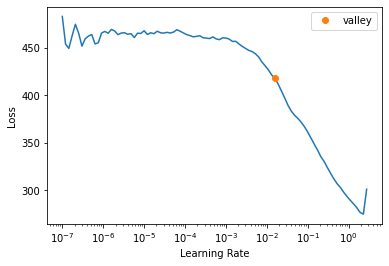

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   20.00      21.15
1   30.00      19.76
2   21.00      16.48
3   37.00      29.35
4   11.00      25.46
XGBoost RMSE:  10.224337


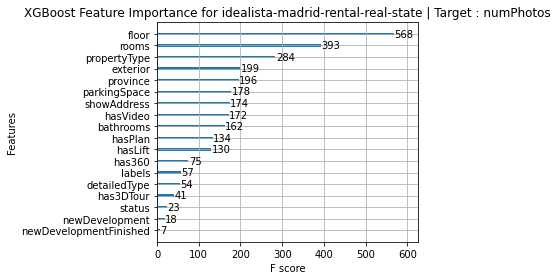

<Figure size 432x288 with 0 Axes>

In [16]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

        feature  importance
0  propertyType         255
1         rooms         356
2         floor         509
3  parkingSpace         194
4      hasVideo         141


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

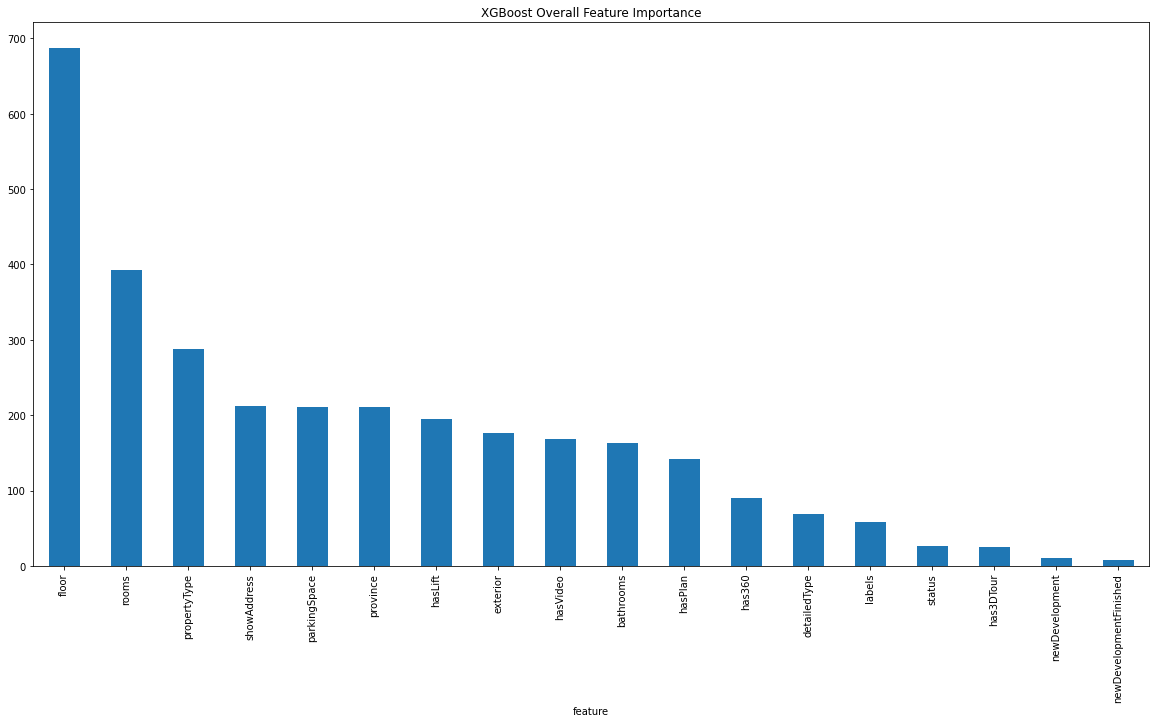

In [17]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [18]:
df.isna().sum()

thumbnail                 0
numPhotos                 0
price                     0
propertyType              0
operation                 0
size                      0
exterior                  0
rooms                     0
bathrooms                 0
province                  0
municipality              0
country                   0
showAddress               0
distance                  0
hasVideo                  0
status                    0
newDevelopment            0
priceByArea               0
detailedType              0
hasPlan                   0
has3DTour                 0
has360                    0
hasStaging                0
superTopHighlight         0
topNewDevelopment         0
floor                     0
district                  0
neighborhood              0
hasLift                   0
parkingSpace              0
labels                    0
newDevelopmentFinished    0
dtype: int64

# **To Be Continued...**